In [1]:
import pandas as pd
import numpy as np
import my_functions as mf
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.vector_ar.vecm import coint_johansen
np.random.seed(22)
import sys

def loading_bar(progress, total, length=30):
    percent = int(100 * progress / total)
    filled = int(length * progress / total)
    bar = '█' * filled + '-' * (length - filled)
    sys.stdout.write(f'\rRunning Simulations: |{bar}| {percent}% --- {progress}/{total}')
    sys.stdout.flush()

T_list = []
num_series_list = []
coint_frac_list = []
num_of_rw_list = []
SADF_mean_list = []
SADF_median_list = []
SADF_min_list = []
SADF_max_list = []
SADF_std_list = []
SADF_p25_list = []
SADF_p75_list = []
SADF_p95_list = []
SADF_p99_list = []
crit_95_list = []
crit_99_list = []
power_list = []

In [2]:
num_series = 10

z = mf.random_walk(1000).reshape(-1, 1) #constant
eps = np.random.normal(0, 1, size=(1000, num_series)) # DEPENDS on T
et = np.random.normal(0, 1, size=(1000, num_series)) #constant

B = 2500
delta = 0.015
multipliers = mf.unique_rounded_uniform(1, 2, num_series, decimals=1) #constant

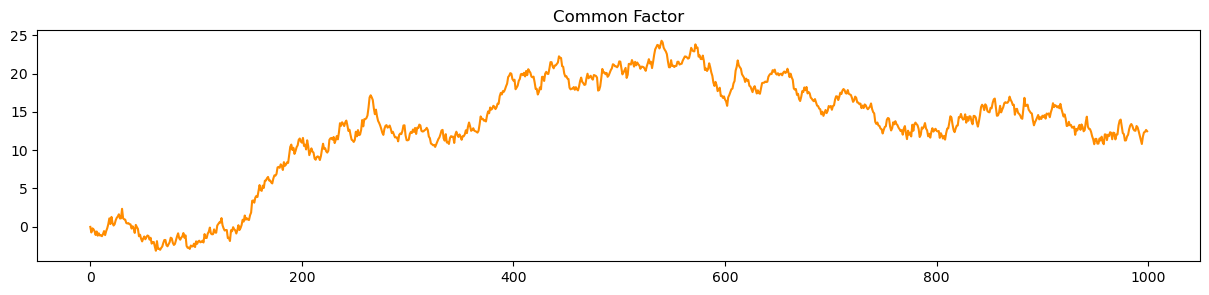

In [3]:
plt.figure(figsize=(15, 3))
plt.plot(z, color = "darkorange")
plt.title("Common Factor")
plt.show()

### Number of Bubble Series 40%

In [5]:
num_of_rw = 0.4

## N = 300

In [7]:
T = 300
e = eps[:T,:].copy()
common_fac = z[:T].copy()

In [8]:
# 1

Running Simulations: |██████████████████████████████| 100% --- 2000/2000

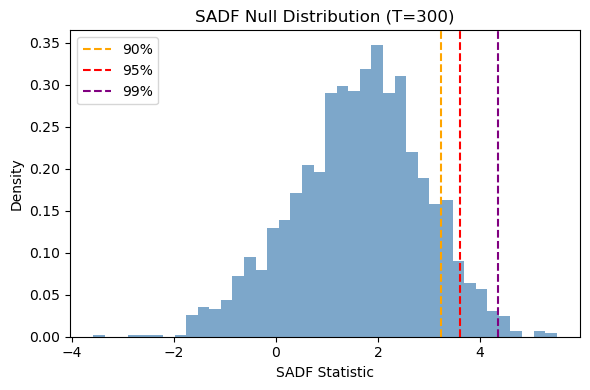

     Critical Value
90%        3.238283
95%        3.614243
99%        4.353311


Running Simulations: |██████████████████████████████| 100% --- 1500/1500

Mean SADF: 4.206
Median SADF: 3.908
Min SADF: -2.131
Max SADF: 13.009
Standard deviation: 2.662
25th percentile: 2.055
75th percentile: 6.023
95th percentile: 9.032
99th percentile: 10.709


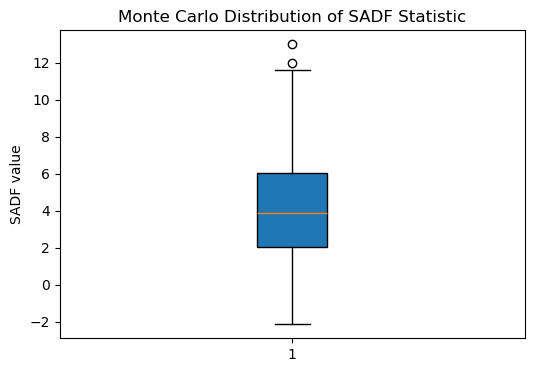

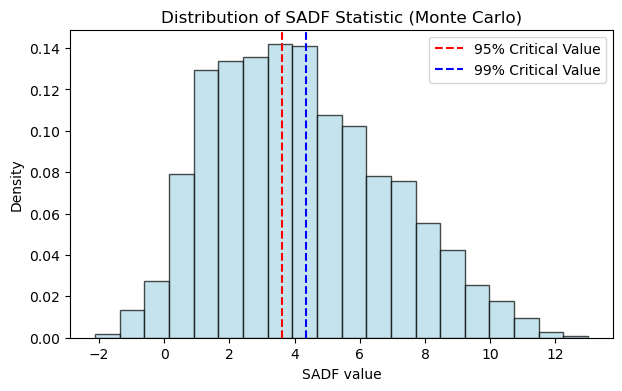

Empirical power at this setting: 0.547


In [9]:
coint_frac = 0.4
B = 2000
crit_val = mf.simulate_sadf_distribution(B=B, T=T, num_series=num_series, coint_frac=coint_frac, num_of_rw=num_of_rw, multi = multipliers, common_fac = common_fac, e = e)
print(crit_val)
crit_val_95 = np.round(crit_val.loc["95%", "Critical Value"],3)
crit_val_99 = np.round(crit_val.loc["99%", "Critical Value"],3)
print("\n")

""" Run Experiment """
sadf_list = []
B = 1500
for i in range(B):
    innov = np.random.normal(0, 1, size=(T - int(T * coint_frac), int(num_of_rw * num_series))) #constant
    sadf_val = mf.run_sadf_bubble_check_2( delta, T, coint_frac, num_of_rw,  common_fac, multipliers, innov, e, crit_val_95, crit_val_99, num_series)
    sadf_list.append(sadf_val)
    loading_bar(i + 1, B)

sadf_array = np.array(sadf_list)
print("\n")
print("Mean SADF:", np.round(np.mean(sadf_array), 3))
print("Median SADF:", np.round(np.median(sadf_array), 3))
print("Min SADF:", np.round(np.min(sadf_array), 3))
print("Max SADF:", np.round(np.max(sadf_array), 3))
print("Standard deviation:", np.round(np.std(sadf_array), 3))
print("25th percentile:", np.round(np.percentile(sadf_array, 25), 3))
print("75th percentile:", np.round(np.percentile(sadf_array, 75), 3))
print("95th percentile:", np.round(np.percentile(sadf_array, 95), 3))
print("99th percentile:", np.round(np.percentile(sadf_array, 99), 3))

plt.figure(figsize=(6,4))
plt.boxplot(sadf_array, vert=True, patch_artist=True)
plt.title("Monte Carlo Distribution of SADF Statistic")
plt.ylabel("SADF value")
plt.show()

plt.figure(figsize=(7,4))
plt.hist(sadf_array, bins=20, color='lightblue', edgecolor='k', alpha=0.7, density=True)
plt.axvline(crit_val_95, color='red', linestyle='--', label='95% Critical Value')
plt.axvline(crit_val_99, color='blue', linestyle='--', label='99% Critical Value')
plt.title("Distribution of SADF Statistic (Monte Carlo)")
plt.xlabel("SADF value")
plt.ylabel("Density")
plt.legend()
plt.show()

power = np.mean(sadf_array > crit_val_95)
print("Empirical power at this setting:", np.round(power, 3))

mean_val   = np.round(np.mean(sadf_array), 3)
median_val = np.round(np.median(sadf_array), 3)
min_val    = np.round(np.min(sadf_array), 3)
max_val    = np.round(np.max(sadf_array), 3)
std_val    = np.round(np.std(sadf_array), 3)
p25_val    = np.round(np.percentile(sadf_array, 25), 3)
p75_val    = np.round(np.percentile(sadf_array, 75), 3)
p95_val    = np.round(np.percentile(sadf_array, 95), 3)
p99_val    = np.round(np.percentile(sadf_array, 99), 3)

SADF_mean_list.append(mean_val)
SADF_median_list.append(median_val)
SADF_min_list.append(min_val)
SADF_max_list.append(max_val)
SADF_std_list.append(std_val)
SADF_p25_list.append(p25_val)
SADF_p75_list.append(p75_val)
SADF_p95_list.append(p95_val)
SADF_p99_list.append(p99_val)
T_list.append(T)
num_series_list.append(num_series)
coint_frac_list.append(coint_frac)
num_of_rw_list.append(num_of_rw)
crit_95_list.append(crit_val_95)
crit_99_list.append(crit_val_99)
power_list.append(power)

In [10]:
# 2 

Running Simulations: |██████████████████████████████| 100% --- 2000/2000

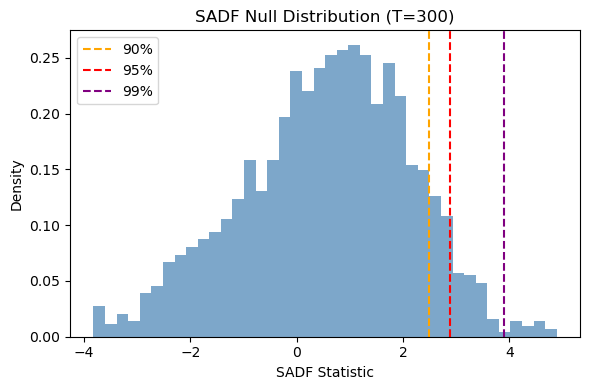

     Critical Value
90%        2.488569
95%        2.891308
99%        3.889365


Running Simulations: |██████████████████████████████| 100% --- 1500/1500

Mean SADF: 3.086
Median SADF: 2.925
Min SADF: -3.824
Max SADF: 10.914
Standard deviation: 2.552
25th percentile: 1.152
75th percentile: 4.942
95th percentile: 7.51
99th percentile: 8.996


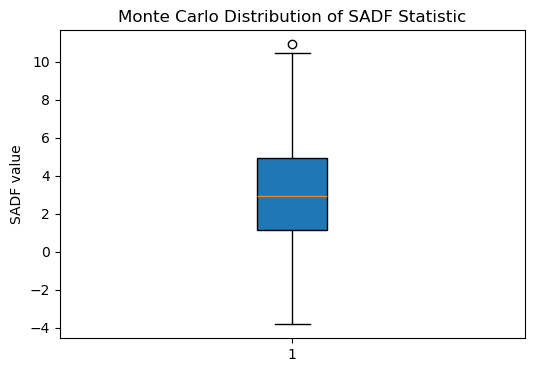

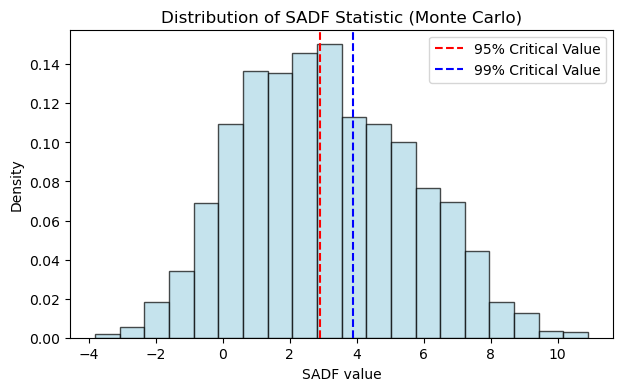

Empirical power at this setting: 0.504


In [11]:
coint_frac = 0.6
B = 2000
crit_val = mf.simulate_sadf_distribution(B=B, T=T, num_series=num_series, coint_frac=coint_frac, num_of_rw=num_of_rw, multi = multipliers, common_fac = common_fac, e = e)
print(crit_val)
crit_val_95 = np.round(crit_val.loc["95%", "Critical Value"],3)
crit_val_99 = np.round(crit_val.loc["99%", "Critical Value"],3)
print("\n")

""" Run Experiment """
sadf_list = []
B = 1500
for i in range(B):
    innov = np.random.normal(0, 1, size=(T - int(T * coint_frac), int(num_of_rw * num_series))) #constant
    sadf_val = mf.run_sadf_bubble_check_2( delta, T, coint_frac, num_of_rw,  common_fac, multipliers, innov, e, crit_val_95, crit_val_99, num_series)
    sadf_list.append(sadf_val)
    loading_bar(i + 1, B)

sadf_array = np.array(sadf_list)
print("\n")
print("Mean SADF:", np.round(np.mean(sadf_array), 3))
print("Median SADF:", np.round(np.median(sadf_array), 3))
print("Min SADF:", np.round(np.min(sadf_array), 3))
print("Max SADF:", np.round(np.max(sadf_array), 3))
print("Standard deviation:", np.round(np.std(sadf_array), 3))
print("25th percentile:", np.round(np.percentile(sadf_array, 25), 3))
print("75th percentile:", np.round(np.percentile(sadf_array, 75), 3))
print("95th percentile:", np.round(np.percentile(sadf_array, 95), 3))
print("99th percentile:", np.round(np.percentile(sadf_array, 99), 3))

plt.figure(figsize=(6,4))
plt.boxplot(sadf_array, vert=True, patch_artist=True)
plt.title("Monte Carlo Distribution of SADF Statistic")
plt.ylabel("SADF value")
plt.show()

plt.figure(figsize=(7,4))
plt.hist(sadf_array, bins=20, color='lightblue', edgecolor='k', alpha=0.7, density=True)
plt.axvline(crit_val_95, color='red', linestyle='--', label='95% Critical Value')
plt.axvline(crit_val_99, color='blue', linestyle='--', label='99% Critical Value')
plt.title("Distribution of SADF Statistic (Monte Carlo)")
plt.xlabel("SADF value")
plt.ylabel("Density")
plt.legend()
plt.show()

power = np.mean(sadf_array > crit_val_95)
print("Empirical power at this setting:", np.round(power, 3))

mean_val   = np.round(np.mean(sadf_array), 3)
median_val = np.round(np.median(sadf_array), 3)
min_val    = np.round(np.min(sadf_array), 3)
max_val    = np.round(np.max(sadf_array), 3)
std_val    = np.round(np.std(sadf_array), 3)
p25_val    = np.round(np.percentile(sadf_array, 25), 3)
p75_val    = np.round(np.percentile(sadf_array, 75), 3)
p95_val    = np.round(np.percentile(sadf_array, 95), 3)
p99_val    = np.round(np.percentile(sadf_array, 99), 3)

SADF_mean_list.append(mean_val)
SADF_median_list.append(median_val)
SADF_min_list.append(min_val)
SADF_max_list.append(max_val)
SADF_std_list.append(std_val)
SADF_p25_list.append(p25_val)
SADF_p75_list.append(p75_val)
SADF_p95_list.append(p95_val)
SADF_p99_list.append(p99_val)
T_list.append(T)
num_series_list.append(num_series)
coint_frac_list.append(coint_frac)
num_of_rw_list.append(num_of_rw)
crit_95_list.append(crit_val_95)
crit_99_list.append(crit_val_99)
power_list.append(power)

In [12]:
# 3

Running Simulations: |██████████████████████████████| 100% --- 2000/2000

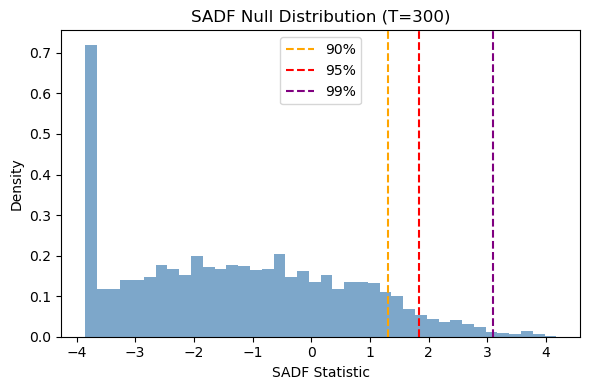

     Critical Value
90%        1.306051
95%        1.831857
99%        3.096356


Running Simulations: |██████████████████████████████| 100% --- 1500/1500

Mean SADF: 1.569
Median SADF: 1.735
Min SADF: -3.856
Max SADF: 8.191
Standard deviation: 2.74
25th percentile: -0.499
75th percentile: 3.791
95th percentile: 5.603
99th percentile: 6.708


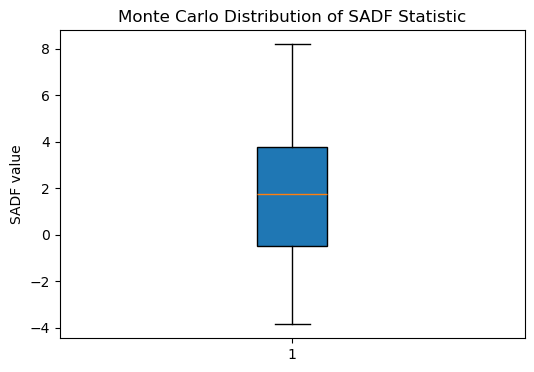

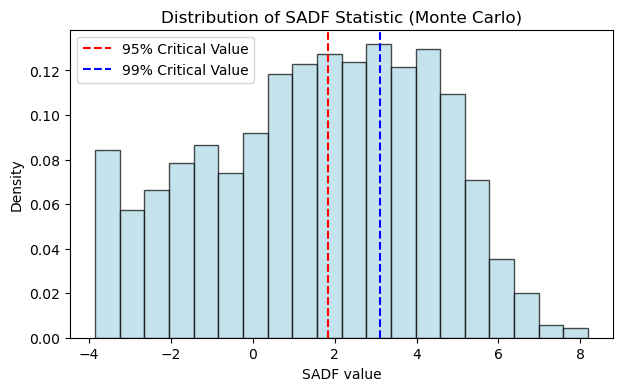

Empirical power at this setting: 0.487


In [13]:
coint_frac = 0.8
B = 2000
crit_val = mf.simulate_sadf_distribution(B=B, T=T, num_series=num_series, coint_frac=coint_frac, num_of_rw=num_of_rw, multi = multipliers, common_fac = common_fac, e = e)
print(crit_val)
crit_val_95 = np.round(crit_val.loc["95%", "Critical Value"],3)
crit_val_99 = np.round(crit_val.loc["99%", "Critical Value"],3)
print("\n")

""" Run Experiment """
sadf_list = []
B = 1500
for i in range(B):
    innov = np.random.normal(0, 1, size=(T - int(T * coint_frac), int(num_of_rw * num_series))) #constant
    sadf_val = mf.run_sadf_bubble_check_2( delta, T, coint_frac, num_of_rw,  common_fac, multipliers, innov, e, crit_val_95, crit_val_99, num_series)
    sadf_list.append(sadf_val)
    loading_bar(i + 1, B)

sadf_array = np.array(sadf_list)
print("\n")
print("Mean SADF:", np.round(np.mean(sadf_array), 3))
print("Median SADF:", np.round(np.median(sadf_array), 3))
print("Min SADF:", np.round(np.min(sadf_array), 3))
print("Max SADF:", np.round(np.max(sadf_array), 3))
print("Standard deviation:", np.round(np.std(sadf_array), 3))
print("25th percentile:", np.round(np.percentile(sadf_array, 25), 3))
print("75th percentile:", np.round(np.percentile(sadf_array, 75), 3))
print("95th percentile:", np.round(np.percentile(sadf_array, 95), 3))
print("99th percentile:", np.round(np.percentile(sadf_array, 99), 3))

plt.figure(figsize=(6,4))
plt.boxplot(sadf_array, vert=True, patch_artist=True)
plt.title("Monte Carlo Distribution of SADF Statistic")
plt.ylabel("SADF value")
plt.show()

plt.figure(figsize=(7,4))
plt.hist(sadf_array, bins=20, color='lightblue', edgecolor='k', alpha=0.7, density=True)
plt.axvline(crit_val_95, color='red', linestyle='--', label='95% Critical Value')
plt.axvline(crit_val_99, color='blue', linestyle='--', label='99% Critical Value')
plt.title("Distribution of SADF Statistic (Monte Carlo)")
plt.xlabel("SADF value")
plt.ylabel("Density")
plt.legend()
plt.show()

power = np.mean(sadf_array > crit_val_95)
print("Empirical power at this setting:", np.round(power, 3))

mean_val   = np.round(np.mean(sadf_array), 3)
median_val = np.round(np.median(sadf_array), 3)
min_val    = np.round(np.min(sadf_array), 3)
max_val    = np.round(np.max(sadf_array), 3)
std_val    = np.round(np.std(sadf_array), 3)
p25_val    = np.round(np.percentile(sadf_array, 25), 3)
p75_val    = np.round(np.percentile(sadf_array, 75), 3)
p95_val    = np.round(np.percentile(sadf_array, 95), 3)
p99_val    = np.round(np.percentile(sadf_array, 99), 3)

SADF_mean_list.append(mean_val)
SADF_median_list.append(median_val)
SADF_min_list.append(min_val)
SADF_max_list.append(max_val)
SADF_std_list.append(std_val)
SADF_p25_list.append(p25_val)
SADF_p75_list.append(p75_val)
SADF_p95_list.append(p95_val)
SADF_p99_list.append(p99_val)
T_list.append(T)
num_series_list.append(num_series)
coint_frac_list.append(coint_frac)
num_of_rw_list.append(num_of_rw)
crit_95_list.append(crit_val_95)
crit_99_list.append(crit_val_99)
power_list.append(power)

## N = 500

In [15]:
T = 500
e = eps[:T,:].copy()
common_fac = z[:T].copy()

In [16]:
# 34

Running Simulations: |██████████████████████████████| 100% --- 2000/2000

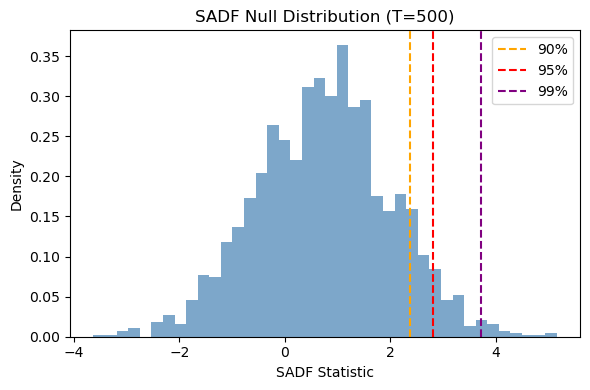

     Critical Value
90%        2.378450
95%        2.804837
99%        3.732482


Running Simulations: |██████████████████████████████| 100% --- 1500/1500

Mean SADF: 17.508
Median SADF: 18.195
Min SADF: -0.252
Max SADF: 21.454
Standard deviation: 2.927
25th percentile: 17.38
75th percentile: 18.794
95th percentile: 19.732
99th percentile: 20.31


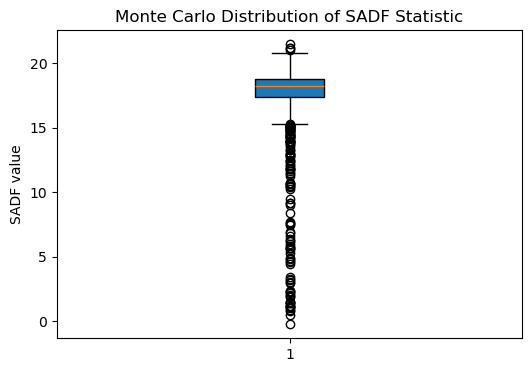

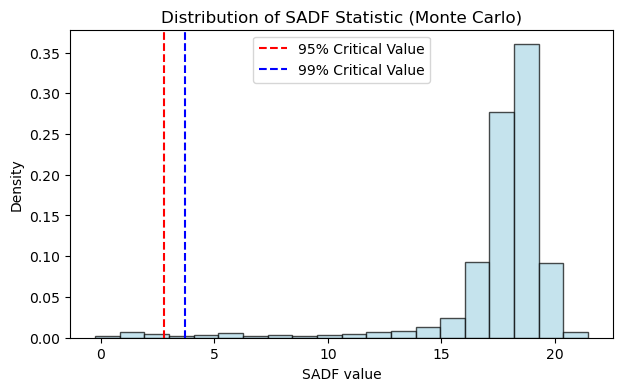

Empirical power at this setting: 0.987


In [17]:
coint_frac = 0.4
B = 2000
crit_val = mf.simulate_sadf_distribution(B=B, T=T, num_series=num_series, coint_frac=coint_frac, num_of_rw=num_of_rw, multi = multipliers, common_fac = common_fac, e = e)
print(crit_val)
crit_val_95 = np.round(crit_val.loc["95%", "Critical Value"],3)
crit_val_99 = np.round(crit_val.loc["99%", "Critical Value"],3)
print("\n")

""" Run Experiment """
sadf_list = []
B = 1500
for i in range(B):
    innov = np.random.normal(0, 1, size=(T - int(T * coint_frac), int(num_of_rw * num_series))) #constant
    sadf_val = mf.run_sadf_bubble_check_2( delta, T, coint_frac, num_of_rw,  common_fac, multipliers, innov, e, crit_val_95, crit_val_99, num_series)
    sadf_list.append(sadf_val)
    loading_bar(i + 1, B)

sadf_array = np.array(sadf_list)
print("\n")
print("Mean SADF:", np.round(np.mean(sadf_array), 3))
print("Median SADF:", np.round(np.median(sadf_array), 3))
print("Min SADF:", np.round(np.min(sadf_array), 3))
print("Max SADF:", np.round(np.max(sadf_array), 3))
print("Standard deviation:", np.round(np.std(sadf_array), 3))
print("25th percentile:", np.round(np.percentile(sadf_array, 25), 3))
print("75th percentile:", np.round(np.percentile(sadf_array, 75), 3))
print("95th percentile:", np.round(np.percentile(sadf_array, 95), 3))
print("99th percentile:", np.round(np.percentile(sadf_array, 99), 3))

plt.figure(figsize=(6,4))
plt.boxplot(sadf_array, vert=True, patch_artist=True)
plt.title("Monte Carlo Distribution of SADF Statistic")
plt.ylabel("SADF value")
plt.show()

plt.figure(figsize=(7,4))
plt.hist(sadf_array, bins=20, color='lightblue', edgecolor='k', alpha=0.7, density=True)
plt.axvline(crit_val_95, color='red', linestyle='--', label='95% Critical Value')
plt.axvline(crit_val_99, color='blue', linestyle='--', label='99% Critical Value')
plt.title("Distribution of SADF Statistic (Monte Carlo)")
plt.xlabel("SADF value")
plt.ylabel("Density")
plt.legend()
plt.show()

power = np.mean(sadf_array > crit_val_95)
print("Empirical power at this setting:", np.round(power, 3))

mean_val   = np.round(np.mean(sadf_array), 3)
median_val = np.round(np.median(sadf_array), 3)
min_val    = np.round(np.min(sadf_array), 3)
max_val    = np.round(np.max(sadf_array), 3)
std_val    = np.round(np.std(sadf_array), 3)
p25_val    = np.round(np.percentile(sadf_array, 25), 3)
p75_val    = np.round(np.percentile(sadf_array, 75), 3)
p95_val    = np.round(np.percentile(sadf_array, 95), 3)
p99_val    = np.round(np.percentile(sadf_array, 99), 3)

SADF_mean_list.append(mean_val)
SADF_median_list.append(median_val)
SADF_min_list.append(min_val)
SADF_max_list.append(max_val)
SADF_std_list.append(std_val)
SADF_p25_list.append(p25_val)
SADF_p75_list.append(p75_val)
SADF_p95_list.append(p95_val)
SADF_p99_list.append(p99_val)
T_list.append(T)
num_series_list.append(num_series)
coint_frac_list.append(coint_frac)
num_of_rw_list.append(num_of_rw)
crit_95_list.append(crit_val_95)
crit_99_list.append(crit_val_99)
power_list.append(power)

In [18]:
# 35

Running Simulations: |██████████████████████████████| 100% --- 2000/2000

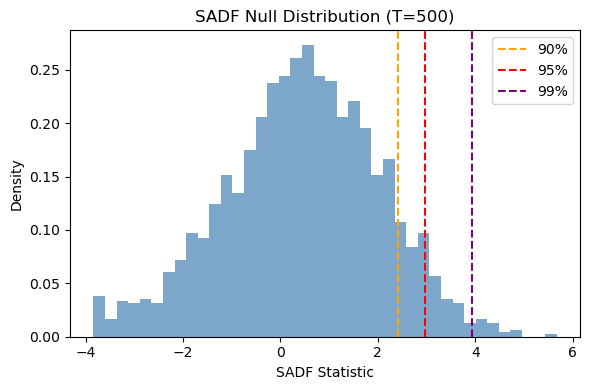

     Critical Value
90%        2.417922
95%        2.973201
99%        3.941562


Running Simulations: |██████████████████████████████| 100% --- 1500/1500

Mean SADF: 13.159
Median SADF: 14.444
Min SADF: -1.675
Max SADF: 19.545
Standard deviation: 4.354
25th percentile: 11.306
75th percentile: 16.25
95th percentile: 17.89
99th percentile: 18.796


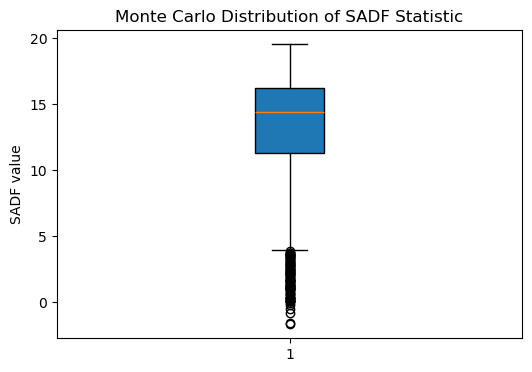

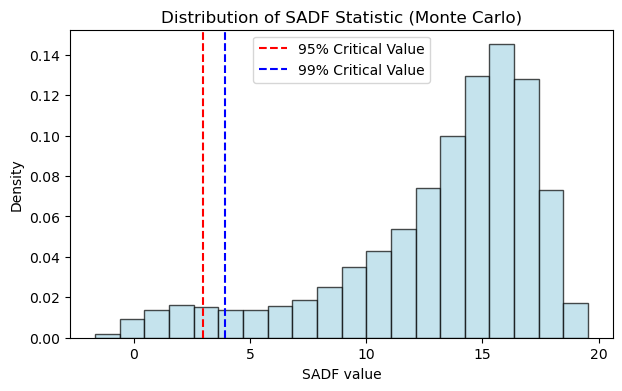

Empirical power at this setting: 0.95


In [19]:
coint_frac = 0.6
B = 2000
crit_val = mf.simulate_sadf_distribution(B=B, T=T, num_series=num_series, coint_frac=coint_frac, num_of_rw=num_of_rw, multi = multipliers, common_fac = common_fac, e = e)
print(crit_val)
crit_val_95 = np.round(crit_val.loc["95%", "Critical Value"],3)
crit_val_99 = np.round(crit_val.loc["99%", "Critical Value"],3)
print("\n")

""" Run Experiment """
sadf_list = []
B = 1500
for i in range(B):
    innov = np.random.normal(0, 1, size=(T - int(T * coint_frac), int(num_of_rw * num_series))) #constant
    sadf_val = mf.run_sadf_bubble_check_2( delta, T, coint_frac, num_of_rw,  common_fac, multipliers, innov, e, crit_val_95, crit_val_99, num_series)
    sadf_list.append(sadf_val)
    loading_bar(i + 1, B)

sadf_array = np.array(sadf_list)
print("\n")
print("Mean SADF:", np.round(np.mean(sadf_array), 3))
print("Median SADF:", np.round(np.median(sadf_array), 3))
print("Min SADF:", np.round(np.min(sadf_array), 3))
print("Max SADF:", np.round(np.max(sadf_array), 3))
print("Standard deviation:", np.round(np.std(sadf_array), 3))
print("25th percentile:", np.round(np.percentile(sadf_array, 25), 3))
print("75th percentile:", np.round(np.percentile(sadf_array, 75), 3))
print("95th percentile:", np.round(np.percentile(sadf_array, 95), 3))
print("99th percentile:", np.round(np.percentile(sadf_array, 99), 3))

plt.figure(figsize=(6,4))
plt.boxplot(sadf_array, vert=True, patch_artist=True)
plt.title("Monte Carlo Distribution of SADF Statistic")
plt.ylabel("SADF value")
plt.show()

plt.figure(figsize=(7,4))
plt.hist(sadf_array, bins=20, color='lightblue', edgecolor='k', alpha=0.7, density=True)
plt.axvline(crit_val_95, color='red', linestyle='--', label='95% Critical Value')
plt.axvline(crit_val_99, color='blue', linestyle='--', label='99% Critical Value')
plt.title("Distribution of SADF Statistic (Monte Carlo)")
plt.xlabel("SADF value")
plt.ylabel("Density")
plt.legend()
plt.show()

power = np.mean(sadf_array > crit_val_95)
print("Empirical power at this setting:", np.round(power, 3))

mean_val   = np.round(np.mean(sadf_array), 3)
median_val = np.round(np.median(sadf_array), 3)
min_val    = np.round(np.min(sadf_array), 3)
max_val    = np.round(np.max(sadf_array), 3)
std_val    = np.round(np.std(sadf_array), 3)
p25_val    = np.round(np.percentile(sadf_array, 25), 3)
p75_val    = np.round(np.percentile(sadf_array, 75), 3)
p95_val    = np.round(np.percentile(sadf_array, 95), 3)
p99_val    = np.round(np.percentile(sadf_array, 99), 3)

SADF_mean_list.append(mean_val)
SADF_median_list.append(median_val)
SADF_min_list.append(min_val)
SADF_max_list.append(max_val)
SADF_std_list.append(std_val)
SADF_p25_list.append(p25_val)
SADF_p75_list.append(p75_val)
SADF_p95_list.append(p95_val)
SADF_p99_list.append(p99_val)
T_list.append(T)
num_series_list.append(num_series)
coint_frac_list.append(coint_frac)
num_of_rw_list.append(num_of_rw)
crit_95_list.append(crit_val_95)
crit_99_list.append(crit_val_99)
power_list.append(power)

In [20]:
# 36

Running Simulations: |██████████████████████████████| 100% --- 2000/2000

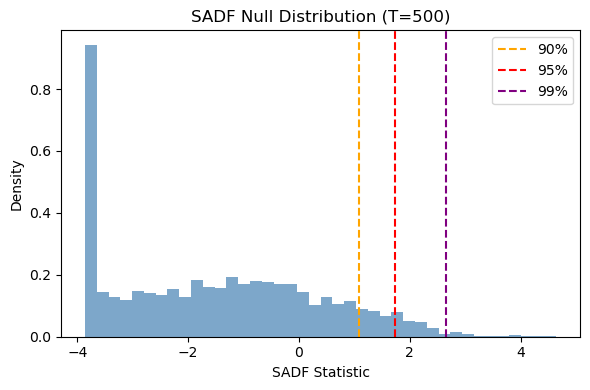

     Critical Value
90%        1.091296
95%        1.736775
99%        2.643978


Running Simulations: |██████████████████████████████| 100% --- 1500/1500

Mean SADF: 7.631
Median SADF: 7.963
Min SADF: -3.864
Max SADF: 13.953
Standard deviation: 2.844
25th percentile: 6.119
75th percentile: 9.656
95th percentile: 11.727
99th percentile: 12.972


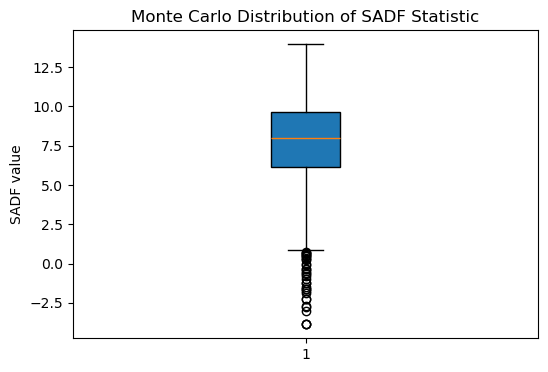

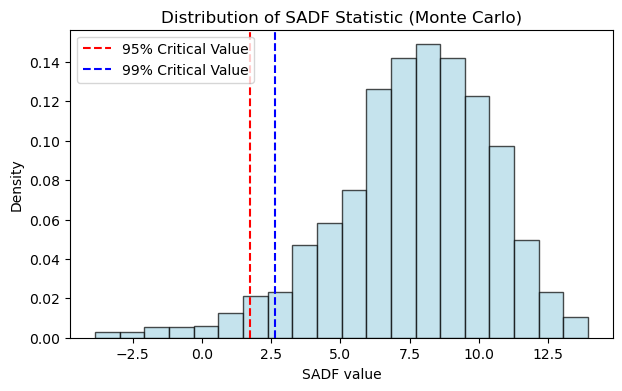

Empirical power at this setting: 0.965


In [21]:
coint_frac = 0.8
B = 2000
crit_val = mf.simulate_sadf_distribution(B=B, T=T, num_series=num_series, coint_frac=coint_frac, num_of_rw=num_of_rw, multi = multipliers, common_fac = common_fac, e = e)
print(crit_val)
crit_val_95 = np.round(crit_val.loc["95%", "Critical Value"],3)
crit_val_99 = np.round(crit_val.loc["99%", "Critical Value"],3)
print("\n")

""" Run Experiment """
sadf_list = []
B = 1500
for i in range(B):
    innov = np.random.normal(0, 1, size=(T - int(T * coint_frac), int(num_of_rw * num_series))) #constant
    sadf_val = mf.run_sadf_bubble_check_2( delta, T, coint_frac, num_of_rw,  common_fac, multipliers, innov, e, crit_val_95, crit_val_99, num_series)
    sadf_list.append(sadf_val)
    loading_bar(i + 1, B)

sadf_array = np.array(sadf_list)
print("\n")
print("Mean SADF:", np.round(np.mean(sadf_array), 3))
print("Median SADF:", np.round(np.median(sadf_array), 3))
print("Min SADF:", np.round(np.min(sadf_array), 3))
print("Max SADF:", np.round(np.max(sadf_array), 3))
print("Standard deviation:", np.round(np.std(sadf_array), 3))
print("25th percentile:", np.round(np.percentile(sadf_array, 25), 3))
print("75th percentile:", np.round(np.percentile(sadf_array, 75), 3))
print("95th percentile:", np.round(np.percentile(sadf_array, 95), 3))
print("99th percentile:", np.round(np.percentile(sadf_array, 99), 3))

plt.figure(figsize=(6,4))
plt.boxplot(sadf_array, vert=True, patch_artist=True)
plt.title("Monte Carlo Distribution of SADF Statistic")
plt.ylabel("SADF value")
plt.show()

plt.figure(figsize=(7,4))
plt.hist(sadf_array, bins=20, color='lightblue', edgecolor='k', alpha=0.7, density=True)
plt.axvline(crit_val_95, color='red', linestyle='--', label='95% Critical Value')
plt.axvline(crit_val_99, color='blue', linestyle='--', label='99% Critical Value')
plt.title("Distribution of SADF Statistic (Monte Carlo)")
plt.xlabel("SADF value")
plt.ylabel("Density")
plt.legend()
plt.show()

power = np.mean(sadf_array > crit_val_95)
print("Empirical power at this setting:", np.round(power, 3))

mean_val   = np.round(np.mean(sadf_array), 3)
median_val = np.round(np.median(sadf_array), 3)
min_val    = np.round(np.min(sadf_array), 3)
max_val    = np.round(np.max(sadf_array), 3)
std_val    = np.round(np.std(sadf_array), 3)
p25_val    = np.round(np.percentile(sadf_array, 25), 3)
p75_val    = np.round(np.percentile(sadf_array, 75), 3)
p95_val    = np.round(np.percentile(sadf_array, 95), 3)
p99_val    = np.round(np.percentile(sadf_array, 99), 3)

SADF_mean_list.append(mean_val)
SADF_median_list.append(median_val)
SADF_min_list.append(min_val)
SADF_max_list.append(max_val)
SADF_std_list.append(std_val)
SADF_p25_list.append(p25_val)
SADF_p75_list.append(p75_val)
SADF_p95_list.append(p95_val)
SADF_p99_list.append(p99_val)
T_list.append(T)
num_series_list.append(num_series)
coint_frac_list.append(coint_frac)
num_of_rw_list.append(num_of_rw)
crit_95_list.append(crit_val_95)
crit_99_list.append(crit_val_99)
power_list.append(power)

## N = 800

In [23]:
T = 800
e = eps[:T,:].copy()
common_fac = z[:T].copy()

In [24]:
# 67

Running Simulations: |██████████████████████████████| 100% --- 2000/2000

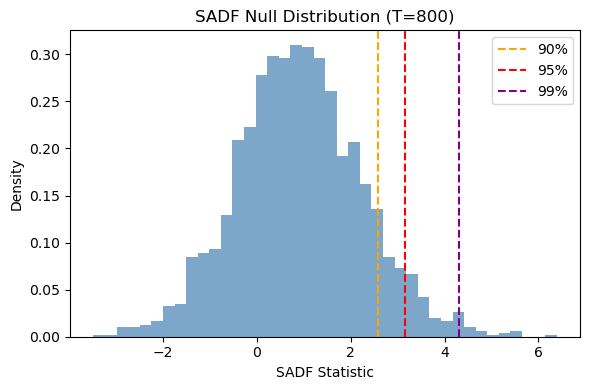

     Critical Value
90%        2.588459
95%        3.167861
99%        4.306054


Running Simulations: |██████████████████████████████| 100% --- 1500/1500

Mean SADF: 23.329
Median SADF: 23.352
Min SADF: 1.875
Max SADF: 25.82
Standard deviation: 1.03
25th percentile: 22.823
75th percentile: 23.908
95th percentile: 24.64
99th percentile: 25.101


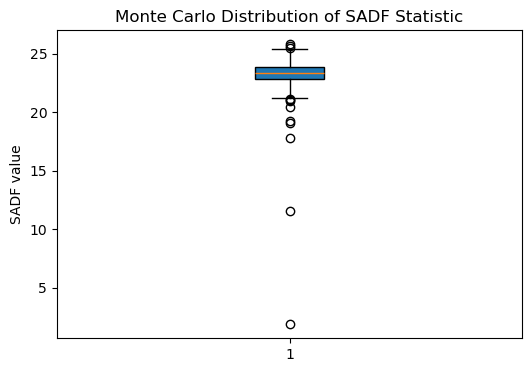

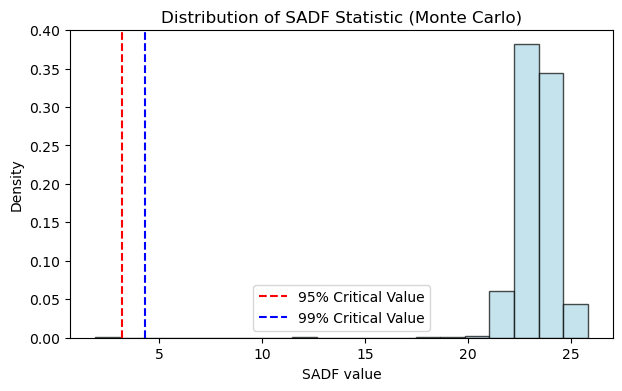

Empirical power at this setting: 0.999


In [25]:
coint_frac = 0.4
B = 2000
crit_val = mf.simulate_sadf_distribution(B=B, T=T, num_series=num_series, coint_frac=coint_frac, num_of_rw=num_of_rw, multi = multipliers, common_fac = common_fac, e = e)
print(crit_val)
crit_val_95 = np.round(crit_val.loc["95%", "Critical Value"],3)
crit_val_99 = np.round(crit_val.loc["99%", "Critical Value"],3)
print("\n")

""" Run Experiment """
sadf_list = []
B = 1500
for i in range(B):
    innov = np.random.normal(0, 1, size=(T - int(T * coint_frac), int(num_of_rw * num_series))) #constant
    sadf_val = mf.run_sadf_bubble_check_2( delta, T, coint_frac, num_of_rw,  common_fac, multipliers, innov, e, crit_val_95, crit_val_99, num_series)
    sadf_list.append(sadf_val)
    loading_bar(i + 1, B)

sadf_array = np.array(sadf_list)
print("\n")
print("Mean SADF:", np.round(np.mean(sadf_array), 3))
print("Median SADF:", np.round(np.median(sadf_array), 3))
print("Min SADF:", np.round(np.min(sadf_array), 3))
print("Max SADF:", np.round(np.max(sadf_array), 3))
print("Standard deviation:", np.round(np.std(sadf_array), 3))
print("25th percentile:", np.round(np.percentile(sadf_array, 25), 3))
print("75th percentile:", np.round(np.percentile(sadf_array, 75), 3))
print("95th percentile:", np.round(np.percentile(sadf_array, 95), 3))
print("99th percentile:", np.round(np.percentile(sadf_array, 99), 3))

plt.figure(figsize=(6,4))
plt.boxplot(sadf_array, vert=True, patch_artist=True)
plt.title("Monte Carlo Distribution of SADF Statistic")
plt.ylabel("SADF value")
plt.show()

plt.figure(figsize=(7,4))
plt.hist(sadf_array, bins=20, color='lightblue', edgecolor='k', alpha=0.7, density=True)
plt.axvline(crit_val_95, color='red', linestyle='--', label='95% Critical Value')
plt.axvline(crit_val_99, color='blue', linestyle='--', label='99% Critical Value')
plt.title("Distribution of SADF Statistic (Monte Carlo)")
plt.xlabel("SADF value")
plt.ylabel("Density")
plt.legend()
plt.show()

power = np.mean(sadf_array > crit_val_95)
print("Empirical power at this setting:", np.round(power, 3))

mean_val   = np.round(np.mean(sadf_array), 3)
median_val = np.round(np.median(sadf_array), 3)
min_val    = np.round(np.min(sadf_array), 3)
max_val    = np.round(np.max(sadf_array), 3)
std_val    = np.round(np.std(sadf_array), 3)
p25_val    = np.round(np.percentile(sadf_array, 25), 3)
p75_val    = np.round(np.percentile(sadf_array, 75), 3)
p95_val    = np.round(np.percentile(sadf_array, 95), 3)
p99_val    = np.round(np.percentile(sadf_array, 99), 3)

SADF_mean_list.append(mean_val)
SADF_median_list.append(median_val)
SADF_min_list.append(min_val)
SADF_max_list.append(max_val)
SADF_std_list.append(std_val)
SADF_p25_list.append(p25_val)
SADF_p75_list.append(p75_val)
SADF_p95_list.append(p95_val)
SADF_p99_list.append(p99_val)
T_list.append(T)
num_series_list.append(num_series)
coint_frac_list.append(coint_frac)
num_of_rw_list.append(num_of_rw)
crit_95_list.append(crit_val_95)
crit_99_list.append(crit_val_99)
power_list.append(power)

In [26]:
# 68

Running Simulations: |██████████████████████████████| 100% --- 2000/2000

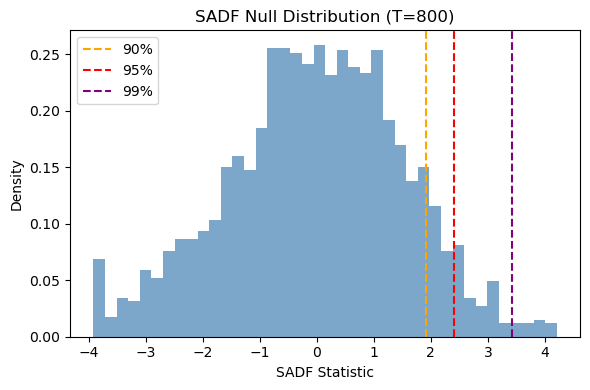

     Critical Value
90%        1.917674
95%        2.398988
99%        3.419936


Running Simulations: |██████████████████████████████| 100% --- 1500/1500

Mean SADF: 24.968
Median SADF: 24.977
Min SADF: 8.707
Max SADF: 27.536
Standard deviation: 0.952
25th percentile: 24.453
75th percentile: 25.525
95th percentile: 26.295
99th percentile: 26.863


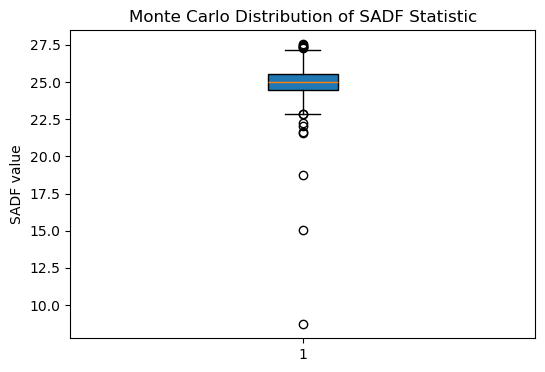

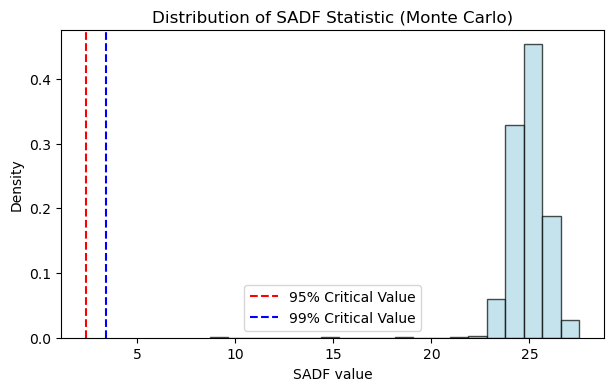

Empirical power at this setting: 1.0


In [27]:
coint_frac = 0.6
B = 2000
crit_val = mf.simulate_sadf_distribution(B=B, T=T, num_series=num_series, coint_frac=coint_frac, num_of_rw=num_of_rw, multi = multipliers, common_fac = common_fac, e = e)
print(crit_val)
crit_val_95 = np.round(crit_val.loc["95%", "Critical Value"],3)
crit_val_99 = np.round(crit_val.loc["99%", "Critical Value"],3)
print("\n")

""" Run Experiment """
sadf_list = []
B = 1500
for i in range(B):
    innov = np.random.normal(0, 1, size=(T - int(T * coint_frac), int(num_of_rw * num_series))) #constant
    sadf_val = mf.run_sadf_bubble_check_2( delta, T, coint_frac, num_of_rw,  common_fac, multipliers, innov, e, crit_val_95, crit_val_99, num_series)
    sadf_list.append(sadf_val)
    loading_bar(i + 1, B)

sadf_array = np.array(sadf_list)
print("\n")
print("Mean SADF:", np.round(np.mean(sadf_array), 3))
print("Median SADF:", np.round(np.median(sadf_array), 3))
print("Min SADF:", np.round(np.min(sadf_array), 3))
print("Max SADF:", np.round(np.max(sadf_array), 3))
print("Standard deviation:", np.round(np.std(sadf_array), 3))
print("25th percentile:", np.round(np.percentile(sadf_array, 25), 3))
print("75th percentile:", np.round(np.percentile(sadf_array, 75), 3))
print("95th percentile:", np.round(np.percentile(sadf_array, 95), 3))
print("99th percentile:", np.round(np.percentile(sadf_array, 99), 3))

plt.figure(figsize=(6,4))
plt.boxplot(sadf_array, vert=True, patch_artist=True)
plt.title("Monte Carlo Distribution of SADF Statistic")
plt.ylabel("SADF value")
plt.show()

plt.figure(figsize=(7,4))
plt.hist(sadf_array, bins=20, color='lightblue', edgecolor='k', alpha=0.7, density=True)
plt.axvline(crit_val_95, color='red', linestyle='--', label='95% Critical Value')
plt.axvline(crit_val_99, color='blue', linestyle='--', label='99% Critical Value')
plt.title("Distribution of SADF Statistic (Monte Carlo)")
plt.xlabel("SADF value")
plt.ylabel("Density")
plt.legend()
plt.show()

power = np.mean(sadf_array > crit_val_95)
print("Empirical power at this setting:", np.round(power, 3))

mean_val   = np.round(np.mean(sadf_array), 3)
median_val = np.round(np.median(sadf_array), 3)
min_val    = np.round(np.min(sadf_array), 3)
max_val    = np.round(np.max(sadf_array), 3)
std_val    = np.round(np.std(sadf_array), 3)
p25_val    = np.round(np.percentile(sadf_array, 25), 3)
p75_val    = np.round(np.percentile(sadf_array, 75), 3)
p95_val    = np.round(np.percentile(sadf_array, 95), 3)
p99_val    = np.round(np.percentile(sadf_array, 99), 3)

SADF_mean_list.append(mean_val)
SADF_median_list.append(median_val)
SADF_min_list.append(min_val)
SADF_max_list.append(max_val)
SADF_std_list.append(std_val)
SADF_p25_list.append(p25_val)
SADF_p75_list.append(p75_val)
SADF_p95_list.append(p95_val)
SADF_p99_list.append(p99_val)
T_list.append(T)
num_series_list.append(num_series)
coint_frac_list.append(coint_frac)
num_of_rw_list.append(num_of_rw)
crit_95_list.append(crit_val_95)
crit_99_list.append(crit_val_99)
power_list.append(power)

In [28]:
# 69

Running Simulations: |██████████████████████████████| 100% --- 2000/2000

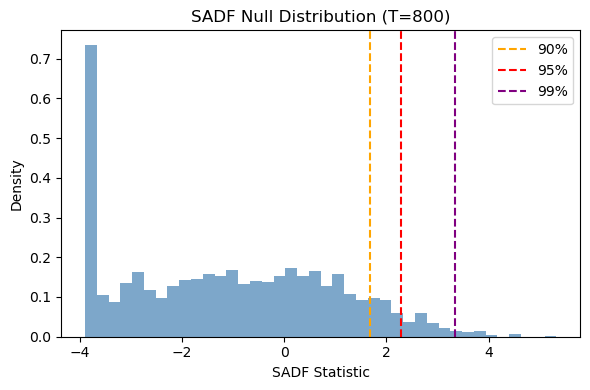

     Critical Value
90%        1.687665
95%        2.275723
99%        3.337289


Running Simulations: |██████████████████████████████| 100% --- 1500/1500

Mean SADF: 16.035
Median SADF: 16.792
Min SADF: -3.902
Max SADF: 24.171
Standard deviation: 4.376
25th percentile: 13.749
75th percentile: 19.15
95th percentile: 21.619
99th percentile: 22.679


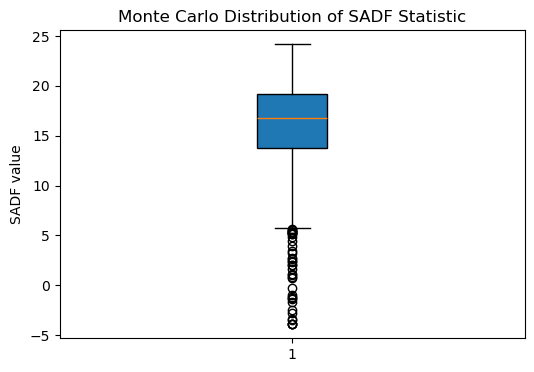

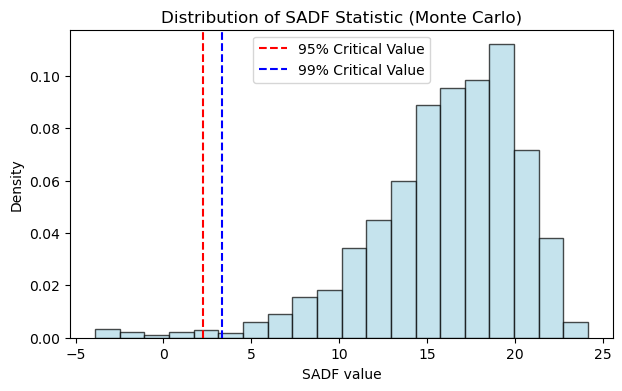

Empirical power at this setting: 0.986


In [29]:
coint_frac = 0.8
B = 2000
crit_val = mf.simulate_sadf_distribution(B=B, T=T, num_series=num_series, coint_frac=coint_frac, num_of_rw=num_of_rw, multi = multipliers, common_fac = common_fac, e = e)
print(crit_val)
crit_val_95 = np.round(crit_val.loc["95%", "Critical Value"],3)
crit_val_99 = np.round(crit_val.loc["99%", "Critical Value"],3)
print("\n")

""" Run Experiment """
sadf_list = []
B = 1500
for i in range(B):
    innov = np.random.normal(0, 1, size=(T - int(T * coint_frac), int(num_of_rw * num_series))) #constant
    sadf_val = mf.run_sadf_bubble_check_2( delta, T, coint_frac, num_of_rw,  common_fac, multipliers, innov, e, crit_val_95, crit_val_99, num_series)
    sadf_list.append(sadf_val)
    loading_bar(i + 1, B)

sadf_array = np.array(sadf_list)
print("\n")
print("Mean SADF:", np.round(np.mean(sadf_array), 3))
print("Median SADF:", np.round(np.median(sadf_array), 3))
print("Min SADF:", np.round(np.min(sadf_array), 3))
print("Max SADF:", np.round(np.max(sadf_array), 3))
print("Standard deviation:", np.round(np.std(sadf_array), 3))
print("25th percentile:", np.round(np.percentile(sadf_array, 25), 3))
print("75th percentile:", np.round(np.percentile(sadf_array, 75), 3))
print("95th percentile:", np.round(np.percentile(sadf_array, 95), 3))
print("99th percentile:", np.round(np.percentile(sadf_array, 99), 3))

plt.figure(figsize=(6,4))
plt.boxplot(sadf_array, vert=True, patch_artist=True)
plt.title("Monte Carlo Distribution of SADF Statistic")
plt.ylabel("SADF value")
plt.show()

plt.figure(figsize=(7,4))
plt.hist(sadf_array, bins=20, color='lightblue', edgecolor='k', alpha=0.7, density=True)
plt.axvline(crit_val_95, color='red', linestyle='--', label='95% Critical Value')
plt.axvline(crit_val_99, color='blue', linestyle='--', label='99% Critical Value')
plt.title("Distribution of SADF Statistic (Monte Carlo)")
plt.xlabel("SADF value")
plt.ylabel("Density")
plt.legend()
plt.show()

power = np.mean(sadf_array > crit_val_95)
print("Empirical power at this setting:", np.round(power, 3))

mean_val   = np.round(np.mean(sadf_array), 3)
median_val = np.round(np.median(sadf_array), 3)
min_val    = np.round(np.min(sadf_array), 3)
max_val    = np.round(np.max(sadf_array), 3)
std_val    = np.round(np.std(sadf_array), 3)
p25_val    = np.round(np.percentile(sadf_array, 25), 3)
p75_val    = np.round(np.percentile(sadf_array, 75), 3)
p95_val    = np.round(np.percentile(sadf_array, 95), 3)
p99_val    = np.round(np.percentile(sadf_array, 99), 3)

SADF_mean_list.append(mean_val)
SADF_median_list.append(median_val)
SADF_min_list.append(min_val)
SADF_max_list.append(max_val)
SADF_std_list.append(std_val)
SADF_p25_list.append(p25_val)
SADF_p75_list.append(p75_val)
SADF_p95_list.append(p95_val)
SADF_p99_list.append(p99_val)
T_list.append(T)
num_series_list.append(num_series)
coint_frac_list.append(coint_frac)
num_of_rw_list.append(num_of_rw)
crit_95_list.append(crit_val_95)
crit_99_list.append(crit_val_99)
power_list.append(power)

## N = 1000

In [31]:
T = 1000
e = eps[:T,:].copy()
common_fac = z[:T].copy()

In [32]:
# 100

Running Simulations: |██████████████████████████████| 100% --- 2000/2000

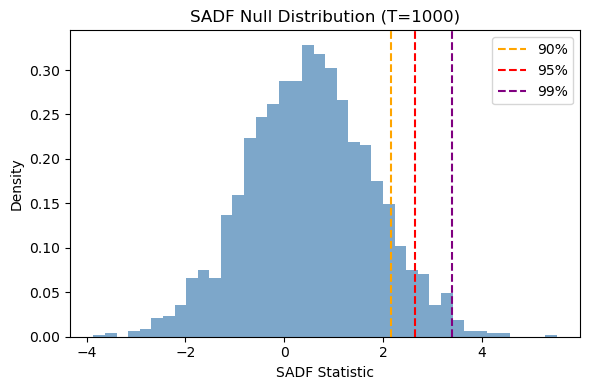

     Critical Value
90%        2.162168
95%        2.645140
99%        3.403686


Running Simulations: |██████████████████████████████| 100% --- 1500/1500

Mean SADF: 26.073
Median SADF: 26.045
Min SADF: 23.567
Max SADF: 28.524
Standard deviation: 0.766
25th percentile: 25.548
75th percentile: 26.588
95th percentile: 27.327
99th percentile: 27.892


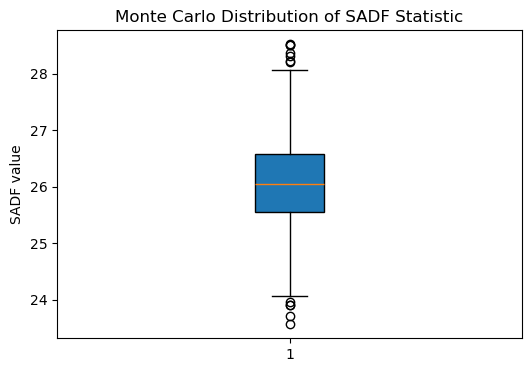

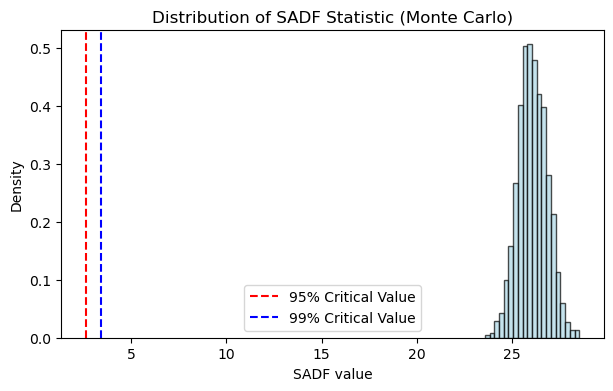

Empirical power at this setting: 1.0


In [33]:
coint_frac = 0.4
B = 2000
crit_val = mf.simulate_sadf_distribution(B=B, T=T, num_series=num_series, coint_frac=coint_frac, num_of_rw=num_of_rw, multi = multipliers, common_fac = common_fac, e = e)
print(crit_val)
crit_val_95 = np.round(crit_val.loc["95%", "Critical Value"],3)
crit_val_99 = np.round(crit_val.loc["99%", "Critical Value"],3)
print("\n")

""" Run Experiment """
sadf_list = []
B = 1500
for i in range(B):
    innov = np.random.normal(0, 1, size=(T - int(T * coint_frac), int(num_of_rw * num_series))) #constant
    sadf_val = mf.run_sadf_bubble_check_2( delta, T, coint_frac, num_of_rw,  common_fac, multipliers, innov, e, crit_val_95, crit_val_99, num_series)
    sadf_list.append(sadf_val)
    loading_bar(i + 1, B)

sadf_array = np.array(sadf_list)
print("\n")
print("Mean SADF:", np.round(np.mean(sadf_array), 3))
print("Median SADF:", np.round(np.median(sadf_array), 3))
print("Min SADF:", np.round(np.min(sadf_array), 3))
print("Max SADF:", np.round(np.max(sadf_array), 3))
print("Standard deviation:", np.round(np.std(sadf_array), 3))
print("25th percentile:", np.round(np.percentile(sadf_array, 25), 3))
print("75th percentile:", np.round(np.percentile(sadf_array, 75), 3))
print("95th percentile:", np.round(np.percentile(sadf_array, 95), 3))
print("99th percentile:", np.round(np.percentile(sadf_array, 99), 3))

plt.figure(figsize=(6,4))
plt.boxplot(sadf_array, vert=True, patch_artist=True)
plt.title("Monte Carlo Distribution of SADF Statistic")
plt.ylabel("SADF value")
plt.show()

plt.figure(figsize=(7,4))
plt.hist(sadf_array, bins=20, color='lightblue', edgecolor='k', alpha=0.7, density=True)
plt.axvline(crit_val_95, color='red', linestyle='--', label='95% Critical Value')
plt.axvline(crit_val_99, color='blue', linestyle='--', label='99% Critical Value')
plt.title("Distribution of SADF Statistic (Monte Carlo)")
plt.xlabel("SADF value")
plt.ylabel("Density")
plt.legend()
plt.show()

power = np.mean(sadf_array > crit_val_95)
print("Empirical power at this setting:", np.round(power, 3))

mean_val   = np.round(np.mean(sadf_array), 3)
median_val = np.round(np.median(sadf_array), 3)
min_val    = np.round(np.min(sadf_array), 3)
max_val    = np.round(np.max(sadf_array), 3)
std_val    = np.round(np.std(sadf_array), 3)
p25_val    = np.round(np.percentile(sadf_array, 25), 3)
p75_val    = np.round(np.percentile(sadf_array, 75), 3)
p95_val    = np.round(np.percentile(sadf_array, 95), 3)
p99_val    = np.round(np.percentile(sadf_array, 99), 3)

SADF_mean_list.append(mean_val)
SADF_median_list.append(median_val)
SADF_min_list.append(min_val)
SADF_max_list.append(max_val)
SADF_std_list.append(std_val)
SADF_p25_list.append(p25_val)
SADF_p75_list.append(p75_val)
SADF_p95_list.append(p95_val)
SADF_p99_list.append(p99_val)
T_list.append(T)
num_series_list.append(num_series)
coint_frac_list.append(coint_frac)
num_of_rw_list.append(num_of_rw)
crit_95_list.append(crit_val_95)
crit_99_list.append(crit_val_99)
power_list.append(power)

In [34]:
# 101

Running Simulations: |██████████████████████████████| 100% --- 2000/2000

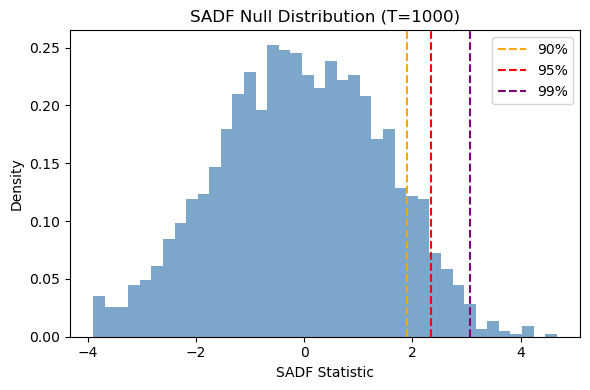

     Critical Value
90%        1.908847
95%        2.344478
99%        3.074956


Running Simulations: |██████████████████████████████| 100% --- 1500/1500

Mean SADF: 28.585
Median SADF: 28.654
Min SADF: 1.486
Max SADF: 31.137
Standard deviation: 1.494
25th percentile: 28.101
75th percentile: 29.206
95th percentile: 29.966
99th percentile: 30.403


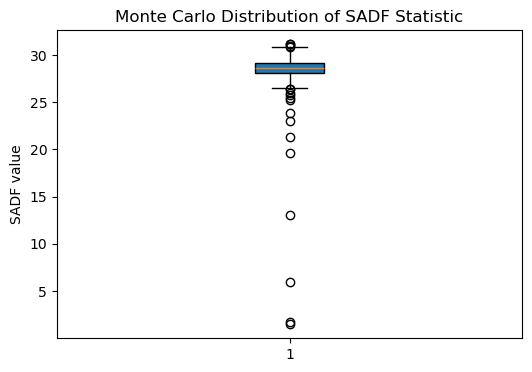

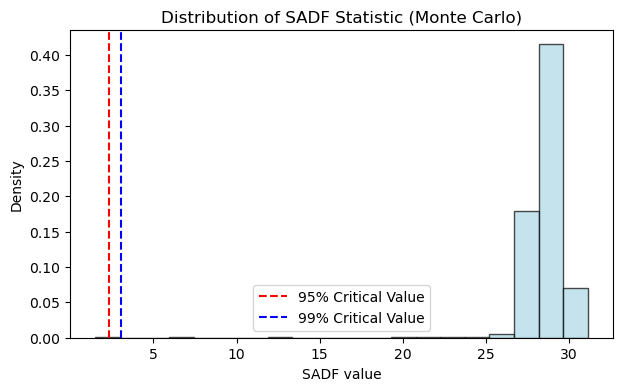

Empirical power at this setting: 0.999


In [35]:
coint_frac = 0.6
B = 2000
crit_val = mf.simulate_sadf_distribution(B=B, T=T, num_series=num_series, coint_frac=coint_frac, num_of_rw=num_of_rw, multi = multipliers, common_fac = common_fac, e = e)
print(crit_val)
crit_val_95 = np.round(crit_val.loc["95%", "Critical Value"],3)
crit_val_99 = np.round(crit_val.loc["99%", "Critical Value"],3)
print("\n")

""" Run Experiment """
sadf_list = []
B = 1500
for i in range(B):
    innov = np.random.normal(0, 1, size=(T - int(T * coint_frac), int(num_of_rw * num_series))) #constant
    sadf_val = mf.run_sadf_bubble_check_2( delta, T, coint_frac, num_of_rw,  common_fac, multipliers, innov, e, crit_val_95, crit_val_99, num_series)
    sadf_list.append(sadf_val)
    loading_bar(i + 1, B)

sadf_array = np.array(sadf_list)
print("\n")
print("Mean SADF:", np.round(np.mean(sadf_array), 3))
print("Median SADF:", np.round(np.median(sadf_array), 3))
print("Min SADF:", np.round(np.min(sadf_array), 3))
print("Max SADF:", np.round(np.max(sadf_array), 3))
print("Standard deviation:", np.round(np.std(sadf_array), 3))
print("25th percentile:", np.round(np.percentile(sadf_array, 25), 3))
print("75th percentile:", np.round(np.percentile(sadf_array, 75), 3))
print("95th percentile:", np.round(np.percentile(sadf_array, 95), 3))
print("99th percentile:", np.round(np.percentile(sadf_array, 99), 3))

plt.figure(figsize=(6,4))
plt.boxplot(sadf_array, vert=True, patch_artist=True)
plt.title("Monte Carlo Distribution of SADF Statistic")
plt.ylabel("SADF value")
plt.show()

plt.figure(figsize=(7,4))
plt.hist(sadf_array, bins=20, color='lightblue', edgecolor='k', alpha=0.7, density=True)
plt.axvline(crit_val_95, color='red', linestyle='--', label='95% Critical Value')
plt.axvline(crit_val_99, color='blue', linestyle='--', label='99% Critical Value')
plt.title("Distribution of SADF Statistic (Monte Carlo)")
plt.xlabel("SADF value")
plt.ylabel("Density")
plt.legend()
plt.show()

power = np.mean(sadf_array > crit_val_95)
print("Empirical power at this setting:", np.round(power, 3))

mean_val   = np.round(np.mean(sadf_array), 3)
median_val = np.round(np.median(sadf_array), 3)
min_val    = np.round(np.min(sadf_array), 3)
max_val    = np.round(np.max(sadf_array), 3)
std_val    = np.round(np.std(sadf_array), 3)
p25_val    = np.round(np.percentile(sadf_array, 25), 3)
p75_val    = np.round(np.percentile(sadf_array, 75), 3)
p95_val    = np.round(np.percentile(sadf_array, 95), 3)
p99_val    = np.round(np.percentile(sadf_array, 99), 3)

SADF_mean_list.append(mean_val)
SADF_median_list.append(median_val)
SADF_min_list.append(min_val)
SADF_max_list.append(max_val)
SADF_std_list.append(std_val)
SADF_p25_list.append(p25_val)
SADF_p75_list.append(p75_val)
SADF_p95_list.append(p95_val)
SADF_p99_list.append(p99_val)
T_list.append(T)
num_series_list.append(num_series)
coint_frac_list.append(coint_frac)
num_of_rw_list.append(num_of_rw)
crit_95_list.append(crit_val_95)
crit_99_list.append(crit_val_99)
power_list.append(power)

In [36]:
# 102

Running Simulations: |██████████████████████████████| 100% --- 2000/2000

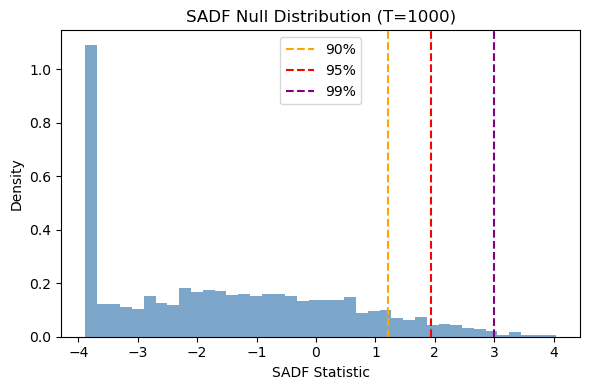

     Critical Value
90%        1.212346
95%        1.942721
99%        3.001355


Running Simulations: |██████████████████████████████| 100% --- 1500/1500

Mean SADF: 20.2
Median SADF: 21.91
Min SADF: -3.887
Max SADF: 30.213
Standard deviation: 6.503
25th percentile: 17.122
75th percentile: 25.086
95th percentile: 27.514
99th percentile: 28.849


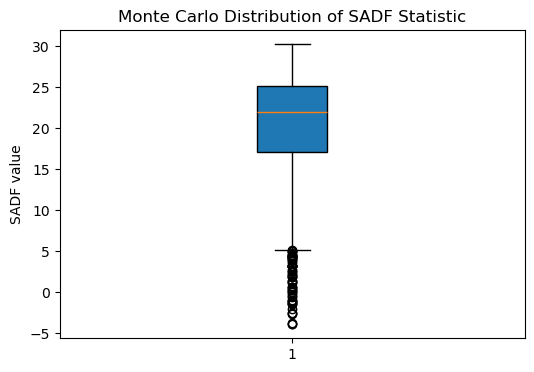

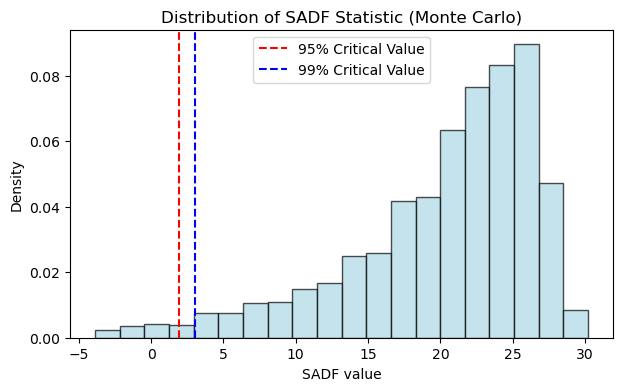

Empirical power at this setting: 0.98


In [37]:
coint_frac = 0.8
B = 2000
crit_val = mf.simulate_sadf_distribution(B=B, T=T, num_series=num_series, coint_frac=coint_frac, num_of_rw=num_of_rw, multi = multipliers, common_fac = common_fac, e = e)
print(crit_val)
crit_val_95 = np.round(crit_val.loc["95%", "Critical Value"],3)
crit_val_99 = np.round(crit_val.loc["99%", "Critical Value"],3)
print("\n")

""" Run Experiment """
sadf_list = []
B = 1500
for i in range(B):
    innov = np.random.normal(0, 1, size=(T - int(T * coint_frac), int(num_of_rw * num_series))) #constant
    sadf_val = mf.run_sadf_bubble_check_2( delta, T, coint_frac, num_of_rw,  common_fac, multipliers, innov, e, crit_val_95, crit_val_99, num_series)
    sadf_list.append(sadf_val)
    loading_bar(i + 1, B)

sadf_array = np.array(sadf_list)
print("\n")
print("Mean SADF:", np.round(np.mean(sadf_array), 3))
print("Median SADF:", np.round(np.median(sadf_array), 3))
print("Min SADF:", np.round(np.min(sadf_array), 3))
print("Max SADF:", np.round(np.max(sadf_array), 3))
print("Standard deviation:", np.round(np.std(sadf_array), 3))
print("25th percentile:", np.round(np.percentile(sadf_array, 25), 3))
print("75th percentile:", np.round(np.percentile(sadf_array, 75), 3))
print("95th percentile:", np.round(np.percentile(sadf_array, 95), 3))
print("99th percentile:", np.round(np.percentile(sadf_array, 99), 3))

plt.figure(figsize=(6,4))
plt.boxplot(sadf_array, vert=True, patch_artist=True)
plt.title("Monte Carlo Distribution of SADF Statistic")
plt.ylabel("SADF value")
plt.show()

plt.figure(figsize=(7,4))
plt.hist(sadf_array, bins=20, color='lightblue', edgecolor='k', alpha=0.7, density=True)
plt.axvline(crit_val_95, color='red', linestyle='--', label='95% Critical Value')
plt.axvline(crit_val_99, color='blue', linestyle='--', label='99% Critical Value')
plt.title("Distribution of SADF Statistic (Monte Carlo)")
plt.xlabel("SADF value")
plt.ylabel("Density")
plt.legend()
plt.show()

power = np.mean(sadf_array > crit_val_95)
print("Empirical power at this setting:", np.round(power, 3))

mean_val   = np.round(np.mean(sadf_array), 3)
median_val = np.round(np.median(sadf_array), 3)
min_val    = np.round(np.min(sadf_array), 3)
max_val    = np.round(np.max(sadf_array), 3)
std_val    = np.round(np.std(sadf_array), 3)
p25_val    = np.round(np.percentile(sadf_array, 25), 3)
p75_val    = np.round(np.percentile(sadf_array, 75), 3)
p95_val    = np.round(np.percentile(sadf_array, 95), 3)
p99_val    = np.round(np.percentile(sadf_array, 99), 3)

SADF_mean_list.append(mean_val)
SADF_median_list.append(median_val)
SADF_min_list.append(min_val)
SADF_max_list.append(max_val)
SADF_std_list.append(std_val)
SADF_p25_list.append(p25_val)
SADF_p75_list.append(p75_val)
SADF_p95_list.append(p95_val)
SADF_p99_list.append(p99_val)
T_list.append(T)
num_series_list.append(num_series)
coint_frac_list.append(coint_frac)
num_of_rw_list.append(num_of_rw)
crit_95_list.append(crit_val_95)
crit_99_list.append(crit_val_99)
power_list.append(power)

### Number of Bubble Series 60%

In [39]:
num_of_rw = 0.6

## N = 300

In [41]:
T = 300
e = eps[:T,:].copy()
common_fac = z[:T].copy()

Running Simulations: |██████████████████████████████| 100% --- 2000/2000

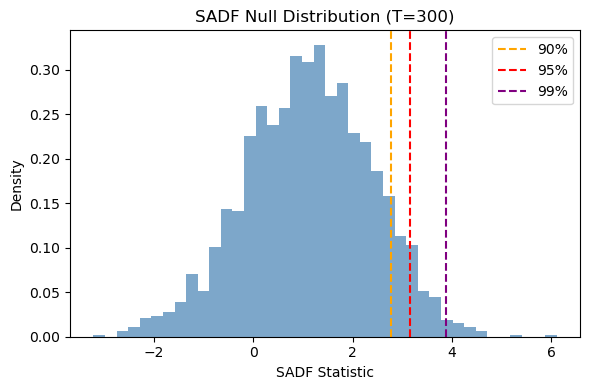

     Critical Value
90%        2.766836
95%        3.162056
99%        3.874208


Running Simulations: |██████████████████████████████| 100% --- 1500/1500

Mean SADF: 4.47
Median SADF: 4.216
Min SADF: -3.036
Max SADF: 13.238
Standard deviation: 3.018
25th percentile: 2.075
75th percentile: 6.602
95th percentile: 9.984
99th percentile: 11.447


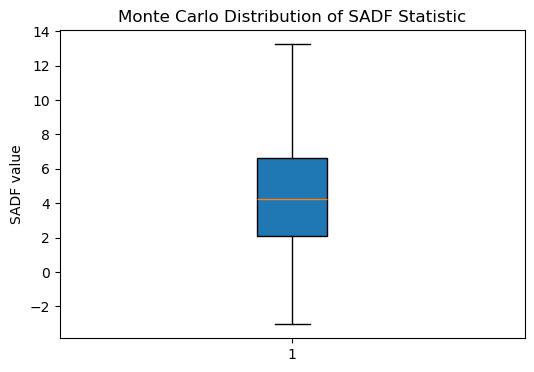

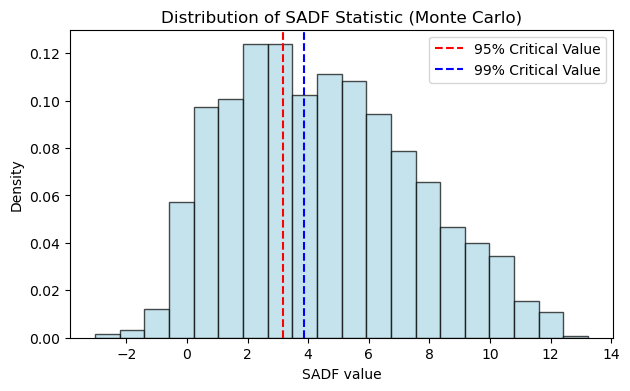

Empirical power at this setting: 0.627


In [42]:
coint_frac = 0.4
B = 2000
crit_val = mf.simulate_sadf_distribution(B=B, T=T, num_series=num_series, coint_frac=coint_frac, num_of_rw=num_of_rw, multi = multipliers, common_fac = common_fac, e = e)
print(crit_val)
crit_val_95 = np.round(crit_val.loc["95%", "Critical Value"],3)
crit_val_99 = np.round(crit_val.loc["99%", "Critical Value"],3)
print("\n")

""" Run Experiment """
sadf_list = []
B = 1500
for i in range(B):
    innov = np.random.normal(0, 1, size=(T - int(T * coint_frac), int(num_of_rw * num_series))) #constant
    sadf_val = mf.run_sadf_bubble_check_2( delta, T, coint_frac, num_of_rw,  common_fac, multipliers, innov, e, crit_val_95, crit_val_99, num_series)
    sadf_list.append(sadf_val)
    loading_bar(i + 1, B)

sadf_array = np.array(sadf_list)
print("\n")
print("Mean SADF:", np.round(np.mean(sadf_array), 3))
print("Median SADF:", np.round(np.median(sadf_array), 3))
print("Min SADF:", np.round(np.min(sadf_array), 3))
print("Max SADF:", np.round(np.max(sadf_array), 3))
print("Standard deviation:", np.round(np.std(sadf_array), 3))
print("25th percentile:", np.round(np.percentile(sadf_array, 25), 3))
print("75th percentile:", np.round(np.percentile(sadf_array, 75), 3))
print("95th percentile:", np.round(np.percentile(sadf_array, 95), 3))
print("99th percentile:", np.round(np.percentile(sadf_array, 99), 3))

plt.figure(figsize=(6,4))
plt.boxplot(sadf_array, vert=True, patch_artist=True)
plt.title("Monte Carlo Distribution of SADF Statistic")
plt.ylabel("SADF value")
plt.show()

plt.figure(figsize=(7,4))
plt.hist(sadf_array, bins=20, color='lightblue', edgecolor='k', alpha=0.7, density=True)
plt.axvline(crit_val_95, color='red', linestyle='--', label='95% Critical Value')
plt.axvline(crit_val_99, color='blue', linestyle='--', label='99% Critical Value')
plt.title("Distribution of SADF Statistic (Monte Carlo)")
plt.xlabel("SADF value")
plt.ylabel("Density")
plt.legend()
plt.show()

power = np.mean(sadf_array > crit_val_95)
print("Empirical power at this setting:", np.round(power, 3))

mean_val   = np.round(np.mean(sadf_array), 3)
median_val = np.round(np.median(sadf_array), 3)
min_val    = np.round(np.min(sadf_array), 3)
max_val    = np.round(np.max(sadf_array), 3)
std_val    = np.round(np.std(sadf_array), 3)
p25_val    = np.round(np.percentile(sadf_array, 25), 3)
p75_val    = np.round(np.percentile(sadf_array, 75), 3)
p95_val    = np.round(np.percentile(sadf_array, 95), 3)
p99_val    = np.round(np.percentile(sadf_array, 99), 3)

SADF_mean_list.append(mean_val)
SADF_median_list.append(median_val)
SADF_min_list.append(min_val)
SADF_max_list.append(max_val)
SADF_std_list.append(std_val)
SADF_p25_list.append(p25_val)
SADF_p75_list.append(p75_val)
SADF_p95_list.append(p95_val)
SADF_p99_list.append(p99_val)
T_list.append(T)
num_series_list.append(num_series)
coint_frac_list.append(coint_frac)
num_of_rw_list.append(num_of_rw)
crit_95_list.append(crit_val_95)
crit_99_list.append(crit_val_99)
power_list.append(power)

Running Simulations: |██████████████████████████████| 100% --- 2000/2000

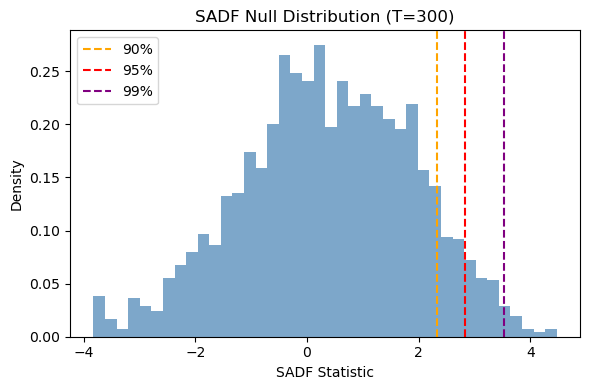

     Critical Value
90%        2.334548
95%        2.836336
99%        3.521608


Running Simulations: |██████████████████████████████| 100% --- 1500/1500

Mean SADF: 2.408
Median SADF: 2.306
Min SADF: -3.824
Max SADF: 10.706
Standard deviation: 2.598
25th percentile: 0.526
75th percentile: 4.042
95th percentile: 6.912
99th percentile: 8.491


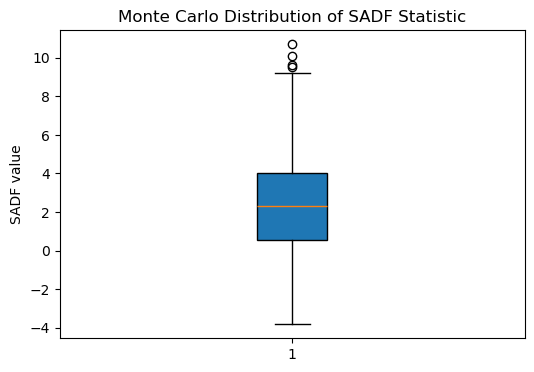

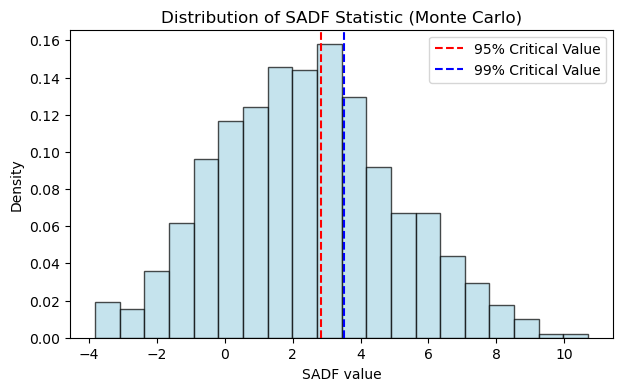

Empirical power at this setting: 0.427


In [43]:
coint_frac = 0.6
B = 2000
crit_val = mf.simulate_sadf_distribution(B=B, T=T, num_series=num_series, coint_frac=coint_frac, num_of_rw=num_of_rw, multi = multipliers, common_fac = common_fac, e = e)
print(crit_val)
crit_val_95 = np.round(crit_val.loc["95%", "Critical Value"],3)
crit_val_99 = np.round(crit_val.loc["99%", "Critical Value"],3)
print("\n")

""" Run Experiment """
sadf_list = []
B = 1500
for i in range(B):
    innov = np.random.normal(0, 1, size=(T - int(T * coint_frac), int(num_of_rw * num_series))) #constant
    sadf_val = mf.run_sadf_bubble_check_2( delta, T, coint_frac, num_of_rw,  common_fac, multipliers, innov, e, crit_val_95, crit_val_99, num_series)
    sadf_list.append(sadf_val)
    loading_bar(i + 1, B)

sadf_array = np.array(sadf_list)
print("\n")
print("Mean SADF:", np.round(np.mean(sadf_array), 3))
print("Median SADF:", np.round(np.median(sadf_array), 3))
print("Min SADF:", np.round(np.min(sadf_array), 3))
print("Max SADF:", np.round(np.max(sadf_array), 3))
print("Standard deviation:", np.round(np.std(sadf_array), 3))
print("25th percentile:", np.round(np.percentile(sadf_array, 25), 3))
print("75th percentile:", np.round(np.percentile(sadf_array, 75), 3))
print("95th percentile:", np.round(np.percentile(sadf_array, 95), 3))
print("99th percentile:", np.round(np.percentile(sadf_array, 99), 3))

plt.figure(figsize=(6,4))
plt.boxplot(sadf_array, vert=True, patch_artist=True)
plt.title("Monte Carlo Distribution of SADF Statistic")
plt.ylabel("SADF value")
plt.show()

plt.figure(figsize=(7,4))
plt.hist(sadf_array, bins=20, color='lightblue', edgecolor='k', alpha=0.7, density=True)
plt.axvline(crit_val_95, color='red', linestyle='--', label='95% Critical Value')
plt.axvline(crit_val_99, color='blue', linestyle='--', label='99% Critical Value')
plt.title("Distribution of SADF Statistic (Monte Carlo)")
plt.xlabel("SADF value")
plt.ylabel("Density")
plt.legend()
plt.show()

power = np.mean(sadf_array > crit_val_95)
print("Empirical power at this setting:", np.round(power, 3))

mean_val   = np.round(np.mean(sadf_array), 3)
median_val = np.round(np.median(sadf_array), 3)
min_val    = np.round(np.min(sadf_array), 3)
max_val    = np.round(np.max(sadf_array), 3)
std_val    = np.round(np.std(sadf_array), 3)
p25_val    = np.round(np.percentile(sadf_array, 25), 3)
p75_val    = np.round(np.percentile(sadf_array, 75), 3)
p95_val    = np.round(np.percentile(sadf_array, 95), 3)
p99_val    = np.round(np.percentile(sadf_array, 99), 3)

SADF_mean_list.append(mean_val)
SADF_median_list.append(median_val)
SADF_min_list.append(min_val)
SADF_max_list.append(max_val)
SADF_std_list.append(std_val)
SADF_p25_list.append(p25_val)
SADF_p75_list.append(p75_val)
SADF_p95_list.append(p95_val)
SADF_p99_list.append(p99_val)
T_list.append(T)
num_series_list.append(num_series)
coint_frac_list.append(coint_frac)
num_of_rw_list.append(num_of_rw)
crit_95_list.append(crit_val_95)
crit_99_list.append(crit_val_99)
power_list.append(power)

Running Simulations: |██████████████████████████████| 100% --- 2000/2000

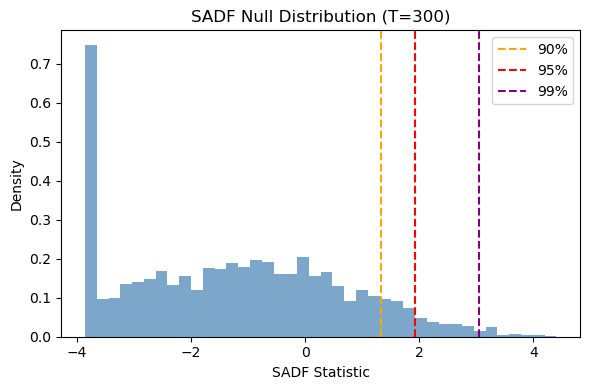

     Critical Value
90%        1.326485
95%        1.919906
99%        3.047605


Running Simulations: |██████████████████████████████| 100% --- 1500/1500

Mean SADF: 0.351
Median SADF: 0.401
Min SADF: -3.856
Max SADF: 7.524
Standard deviation: 2.595
25th percentile: -1.668
75th percentile: 2.318
95th percentile: 4.595
99th percentile: 5.902


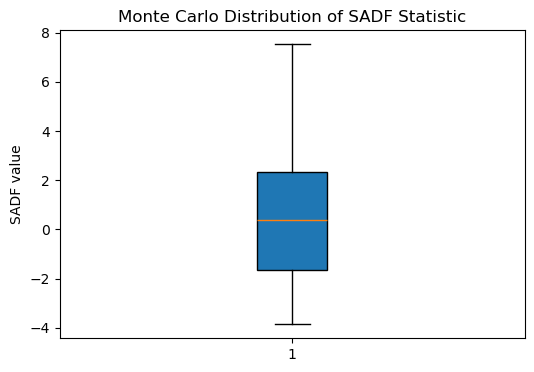

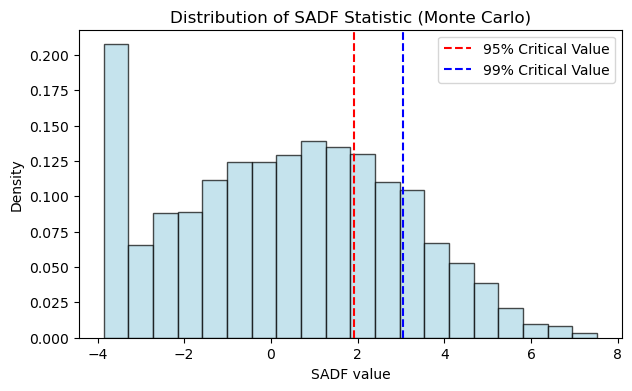

Empirical power at this setting: 0.302


In [44]:
coint_frac = 0.8
B = 2000
crit_val = mf.simulate_sadf_distribution(B=B, T=T, num_series=num_series, coint_frac=coint_frac, num_of_rw=num_of_rw, multi = multipliers, common_fac = common_fac, e = e)
print(crit_val)
crit_val_95 = np.round(crit_val.loc["95%", "Critical Value"],3)
crit_val_99 = np.round(crit_val.loc["99%", "Critical Value"],3)
print("\n")

""" Run Experiment """
sadf_list = []
B = 1500
for i in range(B):
    innov = np.random.normal(0, 1, size=(T - int(T * coint_frac), int(num_of_rw * num_series))) #constant
    sadf_val = mf.run_sadf_bubble_check_2( delta, T, coint_frac, num_of_rw,  common_fac, multipliers, innov, e, crit_val_95, crit_val_99, num_series)
    sadf_list.append(sadf_val)
    loading_bar(i + 1, B)

sadf_array = np.array(sadf_list)
print("\n")
print("Mean SADF:", np.round(np.mean(sadf_array), 3))
print("Median SADF:", np.round(np.median(sadf_array), 3))
print("Min SADF:", np.round(np.min(sadf_array), 3))
print("Max SADF:", np.round(np.max(sadf_array), 3))
print("Standard deviation:", np.round(np.std(sadf_array), 3))
print("25th percentile:", np.round(np.percentile(sadf_array, 25), 3))
print("75th percentile:", np.round(np.percentile(sadf_array, 75), 3))
print("95th percentile:", np.round(np.percentile(sadf_array, 95), 3))
print("99th percentile:", np.round(np.percentile(sadf_array, 99), 3))

plt.figure(figsize=(6,4))
plt.boxplot(sadf_array, vert=True, patch_artist=True)
plt.title("Monte Carlo Distribution of SADF Statistic")
plt.ylabel("SADF value")
plt.show()

plt.figure(figsize=(7,4))
plt.hist(sadf_array, bins=20, color='lightblue', edgecolor='k', alpha=0.7, density=True)
plt.axvline(crit_val_95, color='red', linestyle='--', label='95% Critical Value')
plt.axvline(crit_val_99, color='blue', linestyle='--', label='99% Critical Value')
plt.title("Distribution of SADF Statistic (Monte Carlo)")
plt.xlabel("SADF value")
plt.ylabel("Density")
plt.legend()
plt.show()

power = np.mean(sadf_array > crit_val_95)
print("Empirical power at this setting:", np.round(power, 3))

mean_val   = np.round(np.mean(sadf_array), 3)
median_val = np.round(np.median(sadf_array), 3)
min_val    = np.round(np.min(sadf_array), 3)
max_val    = np.round(np.max(sadf_array), 3)
std_val    = np.round(np.std(sadf_array), 3)
p25_val    = np.round(np.percentile(sadf_array, 25), 3)
p75_val    = np.round(np.percentile(sadf_array, 75), 3)
p95_val    = np.round(np.percentile(sadf_array, 95), 3)
p99_val    = np.round(np.percentile(sadf_array, 99), 3)

SADF_mean_list.append(mean_val)
SADF_median_list.append(median_val)
SADF_min_list.append(min_val)
SADF_max_list.append(max_val)
SADF_std_list.append(std_val)
SADF_p25_list.append(p25_val)
SADF_p75_list.append(p75_val)
SADF_p95_list.append(p95_val)
SADF_p99_list.append(p99_val)
T_list.append(T)
num_series_list.append(num_series)
coint_frac_list.append(coint_frac)
num_of_rw_list.append(num_of_rw)
crit_95_list.append(crit_val_95)
crit_99_list.append(crit_val_99)
power_list.append(power)

## N = 500

In [46]:
T = 500
e = eps[:T,:].copy()
common_fac = z[:T].copy()

Running Simulations: |██████████████████████████████| 100% --- 2000/2000

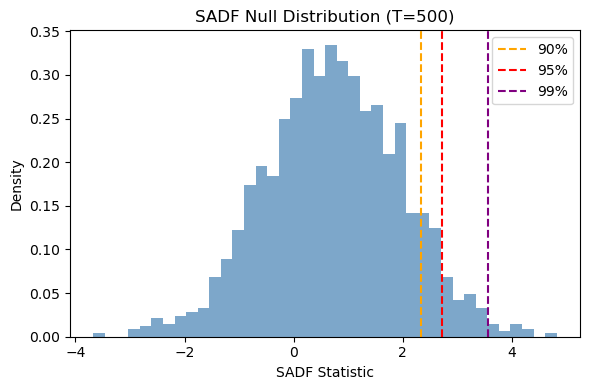

     Critical Value
90%        2.332784
95%        2.720551
99%        3.560033


Running Simulations: |███████████████████-----------| 66% --- 998/1500

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



In [47]:
coint_frac = 0.4
B = 2000
crit_val = mf.simulate_sadf_distribution(B=B, T=T, num_series=num_series, coint_frac=coint_frac, num_of_rw=num_of_rw, multi = multipliers, common_fac = common_fac, e = e)
print(crit_val)
crit_val_95 = np.round(crit_val.loc["95%", "Critical Value"],3)
crit_val_99 = np.round(crit_val.loc["99%", "Critical Value"],3)
print("\n")

""" Run Experiment """
sadf_list = []
B = 1500
for i in range(B):
    innov = np.random.normal(0, 1, size=(T - int(T * coint_frac), int(num_of_rw * num_series))) #constant
    sadf_val = mf.run_sadf_bubble_check_2( delta, T, coint_frac, num_of_rw,  common_fac, multipliers, innov, e, crit_val_95, crit_val_99, num_series)
    sadf_list.append(sadf_val)
    loading_bar(i + 1, B)

sadf_array = np.array(sadf_list)
print("\n")
print("Mean SADF:", np.round(np.mean(sadf_array), 3))
print("Median SADF:", np.round(np.median(sadf_array), 3))
print("Min SADF:", np.round(np.min(sadf_array), 3))
print("Max SADF:", np.round(np.max(sadf_array), 3))
print("Standard deviation:", np.round(np.std(sadf_array), 3))
print("25th percentile:", np.round(np.percentile(sadf_array, 25), 3))
print("75th percentile:", np.round(np.percentile(sadf_array, 75), 3))
print("95th percentile:", np.round(np.percentile(sadf_array, 95), 3))
print("99th percentile:", np.round(np.percentile(sadf_array, 99), 3))

plt.figure(figsize=(6,4))
plt.boxplot(sadf_array, vert=True, patch_artist=True)
plt.title("Monte Carlo Distribution of SADF Statistic")
plt.ylabel("SADF value")
plt.show()

plt.figure(figsize=(7,4))
plt.hist(sadf_array, bins=20, color='lightblue', edgecolor='k', alpha=0.7, density=True)
plt.axvline(crit_val_95, color='red', linestyle='--', label='95% Critical Value')
plt.axvline(crit_val_99, color='blue', linestyle='--', label='99% Critical Value')
plt.title("Distribution of SADF Statistic (Monte Carlo)")
plt.xlabel("SADF value")
plt.ylabel("Density")
plt.legend()
plt.show()

power = np.mean(sadf_array > crit_val_95)
print("Empirical power at this setting:", np.round(power, 3))

mean_val   = np.round(np.mean(sadf_array), 3)
median_val = np.round(np.median(sadf_array), 3)
min_val    = np.round(np.min(sadf_array), 3)
max_val    = np.round(np.max(sadf_array), 3)
std_val    = np.round(np.std(sadf_array), 3)
p25_val    = np.round(np.percentile(sadf_array, 25), 3)
p75_val    = np.round(np.percentile(sadf_array, 75), 3)
p95_val    = np.round(np.percentile(sadf_array, 95), 3)
p99_val    = np.round(np.percentile(sadf_array, 99), 3)

SADF_mean_list.append(mean_val)
SADF_median_list.append(median_val)
SADF_min_list.append(min_val)
SADF_max_list.append(max_val)
SADF_std_list.append(std_val)
SADF_p25_list.append(p25_val)
SADF_p75_list.append(p75_val)
SADF_p95_list.append(p95_val)
SADF_p99_list.append(p99_val)
T_list.append(T)
num_series_list.append(num_series)
coint_frac_list.append(coint_frac)
num_of_rw_list.append(num_of_rw)
crit_95_list.append(crit_val_95)
crit_99_list.append(crit_val_99)
power_list.append(power)

Running Simulations: |██████████████████████████████| 100% --- 2000/2000

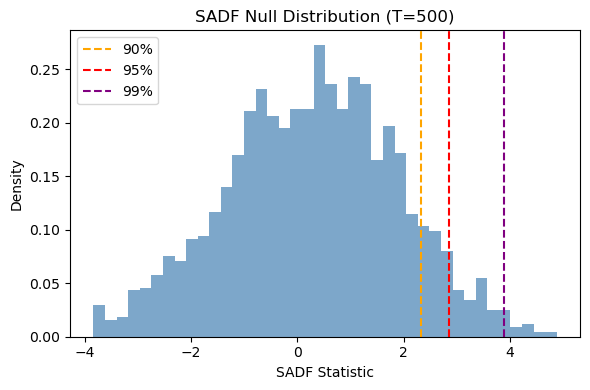

     Critical Value
90%        2.328225
95%        2.852745
99%        3.878042


Running Simulations: |██████████████████████████████| 100% --- 1500/1500

Mean SADF: 11.176
Median SADF: 12.404
Min SADF: -3.839
Max SADF: 19.508
Standard deviation: 5.19
25th percentile: 7.578
75th percentile: 15.359
95th percentile: 17.663
99th percentile: 18.63


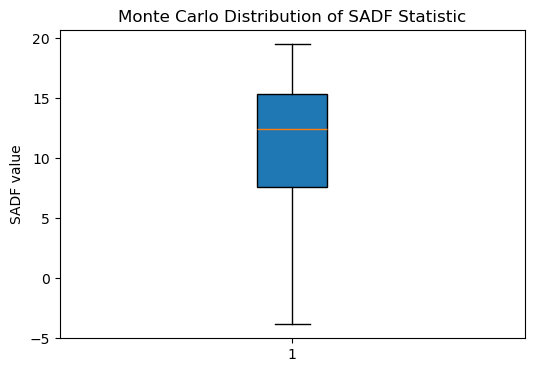

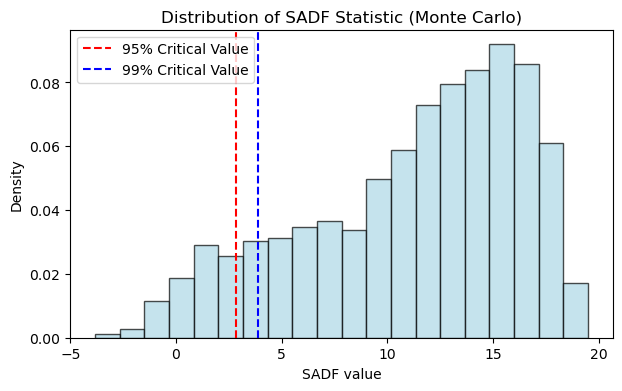

Empirical power at this setting: 0.901


In [48]:
coint_frac = 0.6
B = 2000
crit_val = mf.simulate_sadf_distribution(B=B, T=T, num_series=num_series, coint_frac=coint_frac, num_of_rw=num_of_rw, multi = multipliers, common_fac = common_fac, e = e)
print(crit_val)
crit_val_95 = np.round(crit_val.loc["95%", "Critical Value"],3)
crit_val_99 = np.round(crit_val.loc["99%", "Critical Value"],3)
print("\n")

""" Run Experiment """
sadf_list = []
B = 1500
for i in range(B):
    innov = np.random.normal(0, 1, size=(T - int(T * coint_frac), int(num_of_rw * num_series))) #constant
    sadf_val = mf.run_sadf_bubble_check_2( delta, T, coint_frac, num_of_rw,  common_fac, multipliers, innov, e, crit_val_95, crit_val_99, num_series)
    sadf_list.append(sadf_val)
    loading_bar(i + 1, B)

sadf_array = np.array(sadf_list)
print("\n")
print("Mean SADF:", np.round(np.mean(sadf_array), 3))
print("Median SADF:", np.round(np.median(sadf_array), 3))
print("Min SADF:", np.round(np.min(sadf_array), 3))
print("Max SADF:", np.round(np.max(sadf_array), 3))
print("Standard deviation:", np.round(np.std(sadf_array), 3))
print("25th percentile:", np.round(np.percentile(sadf_array, 25), 3))
print("75th percentile:", np.round(np.percentile(sadf_array, 75), 3))
print("95th percentile:", np.round(np.percentile(sadf_array, 95), 3))
print("99th percentile:", np.round(np.percentile(sadf_array, 99), 3))

plt.figure(figsize=(6,4))
plt.boxplot(sadf_array, vert=True, patch_artist=True)
plt.title("Monte Carlo Distribution of SADF Statistic")
plt.ylabel("SADF value")
plt.show()

plt.figure(figsize=(7,4))
plt.hist(sadf_array, bins=20, color='lightblue', edgecolor='k', alpha=0.7, density=True)
plt.axvline(crit_val_95, color='red', linestyle='--', label='95% Critical Value')
plt.axvline(crit_val_99, color='blue', linestyle='--', label='99% Critical Value')
plt.title("Distribution of SADF Statistic (Monte Carlo)")
plt.xlabel("SADF value")
plt.ylabel("Density")
plt.legend()
plt.show()

power = np.mean(sadf_array > crit_val_95)
print("Empirical power at this setting:", np.round(power, 3))

mean_val   = np.round(np.mean(sadf_array), 3)
median_val = np.round(np.median(sadf_array), 3)
min_val    = np.round(np.min(sadf_array), 3)
max_val    = np.round(np.max(sadf_array), 3)
std_val    = np.round(np.std(sadf_array), 3)
p25_val    = np.round(np.percentile(sadf_array, 25), 3)
p75_val    = np.round(np.percentile(sadf_array, 75), 3)
p95_val    = np.round(np.percentile(sadf_array, 95), 3)
p99_val    = np.round(np.percentile(sadf_array, 99), 3)

SADF_mean_list.append(mean_val)
SADF_median_list.append(median_val)
SADF_min_list.append(min_val)
SADF_max_list.append(max_val)
SADF_std_list.append(std_val)
SADF_p25_list.append(p25_val)
SADF_p75_list.append(p75_val)
SADF_p95_list.append(p95_val)
SADF_p99_list.append(p99_val)
T_list.append(T)
num_series_list.append(num_series)
coint_frac_list.append(coint_frac)
num_of_rw_list.append(num_of_rw)
crit_95_list.append(crit_val_95)
crit_99_list.append(crit_val_99)
power_list.append(power)

Running Simulations: |██████████████████████████████| 100% --- 2000/2000

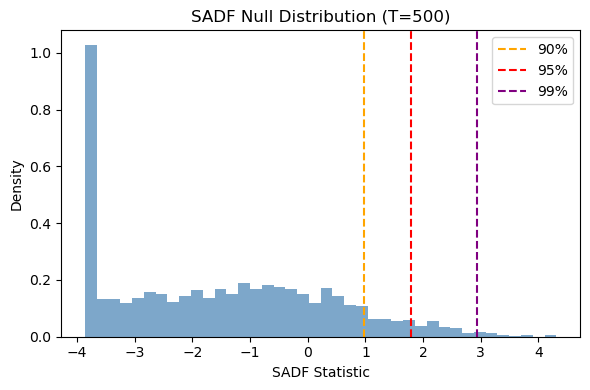

     Critical Value
90%        0.981443
95%        1.786044
99%        2.926608


Running Simulations: |██████████████████████████████| 100% --- 1500/1500

Mean SADF: 5.817
Median SADF: 6.156
Min SADF: -3.864
Max SADF: 13.447
Standard deviation: 3.173
25th percentile: 4.048
75th percentile: 8.07
95th percentile: 10.394
99th percentile: 11.745


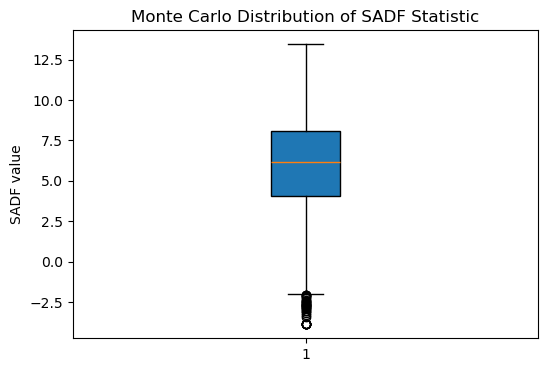

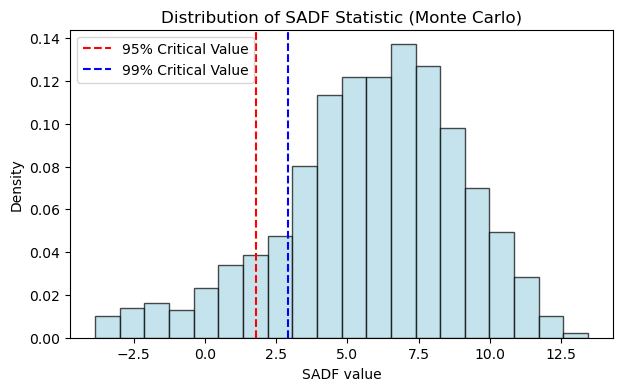

Empirical power at this setting: 0.886


In [49]:
coint_frac = 0.8
B = 2000
crit_val = mf.simulate_sadf_distribution(B=B, T=T, num_series=num_series, coint_frac=coint_frac, num_of_rw=num_of_rw, multi = multipliers, common_fac = common_fac, e = e)
print(crit_val)
crit_val_95 = np.round(crit_val.loc["95%", "Critical Value"],3)
crit_val_99 = np.round(crit_val.loc["99%", "Critical Value"],3)
print("\n")

""" Run Experiment """
sadf_list = []
B = 1500
for i in range(B):
    innov = np.random.normal(0, 1, size=(T - int(T * coint_frac), int(num_of_rw * num_series))) #constant
    sadf_val = mf.run_sadf_bubble_check_2( delta, T, coint_frac, num_of_rw,  common_fac, multipliers, innov, e, crit_val_95, crit_val_99, num_series)
    sadf_list.append(sadf_val)
    loading_bar(i + 1, B)

sadf_array = np.array(sadf_list)
print("\n")
print("Mean SADF:", np.round(np.mean(sadf_array), 3))
print("Median SADF:", np.round(np.median(sadf_array), 3))
print("Min SADF:", np.round(np.min(sadf_array), 3))
print("Max SADF:", np.round(np.max(sadf_array), 3))
print("Standard deviation:", np.round(np.std(sadf_array), 3))
print("25th percentile:", np.round(np.percentile(sadf_array, 25), 3))
print("75th percentile:", np.round(np.percentile(sadf_array, 75), 3))
print("95th percentile:", np.round(np.percentile(sadf_array, 95), 3))
print("99th percentile:", np.round(np.percentile(sadf_array, 99), 3))

plt.figure(figsize=(6,4))
plt.boxplot(sadf_array, vert=True, patch_artist=True)
plt.title("Monte Carlo Distribution of SADF Statistic")
plt.ylabel("SADF value")
plt.show()

plt.figure(figsize=(7,4))
plt.hist(sadf_array, bins=20, color='lightblue', edgecolor='k', alpha=0.7, density=True)
plt.axvline(crit_val_95, color='red', linestyle='--', label='95% Critical Value')
plt.axvline(crit_val_99, color='blue', linestyle='--', label='99% Critical Value')
plt.title("Distribution of SADF Statistic (Monte Carlo)")
plt.xlabel("SADF value")
plt.ylabel("Density")
plt.legend()
plt.show()

power = np.mean(sadf_array > crit_val_95)
print("Empirical power at this setting:", np.round(power, 3))

mean_val   = np.round(np.mean(sadf_array), 3)
median_val = np.round(np.median(sadf_array), 3)
min_val    = np.round(np.min(sadf_array), 3)
max_val    = np.round(np.max(sadf_array), 3)
std_val    = np.round(np.std(sadf_array), 3)
p25_val    = np.round(np.percentile(sadf_array, 25), 3)
p75_val    = np.round(np.percentile(sadf_array, 75), 3)
p95_val    = np.round(np.percentile(sadf_array, 95), 3)
p99_val    = np.round(np.percentile(sadf_array, 99), 3)

SADF_mean_list.append(mean_val)
SADF_median_list.append(median_val)
SADF_min_list.append(min_val)
SADF_max_list.append(max_val)
SADF_std_list.append(std_val)
SADF_p25_list.append(p25_val)
SADF_p75_list.append(p75_val)
SADF_p95_list.append(p95_val)
SADF_p99_list.append(p99_val)
T_list.append(T)
num_series_list.append(num_series)
coint_frac_list.append(coint_frac)
num_of_rw_list.append(num_of_rw)
crit_95_list.append(crit_val_95)
crit_99_list.append(crit_val_99)
power_list.append(power)

## N = 800

In [51]:
T = 800
e = eps[:T,:].copy()
common_fac = z[:T].copy()

Running Simulations: |██████████████████████████████| 100% --- 2000/2000

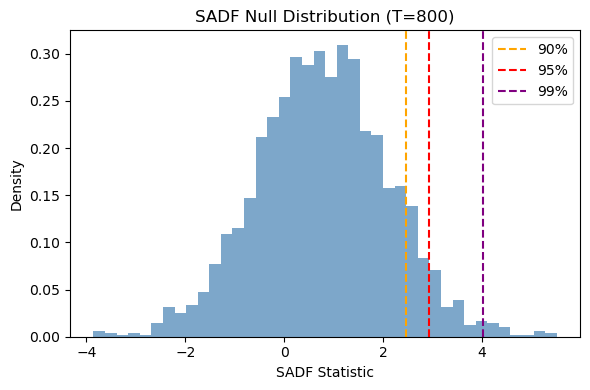

     Critical Value
90%        2.470614
95%        2.931126
99%        4.013175


Running Simulations: |██████████████████████████████| 100% --- 1500/1500

Mean SADF: 23.672
Median SADF: 23.833
Min SADF: 1.461
Max SADF: 26.524
Standard deviation: 1.691
25th percentile: 23.267
75th percentile: 24.389
95th percentile: 25.212
99th percentile: 25.858


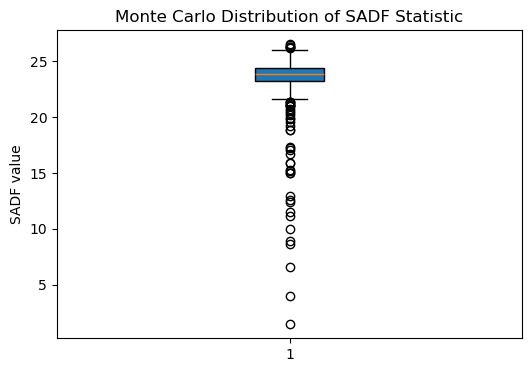

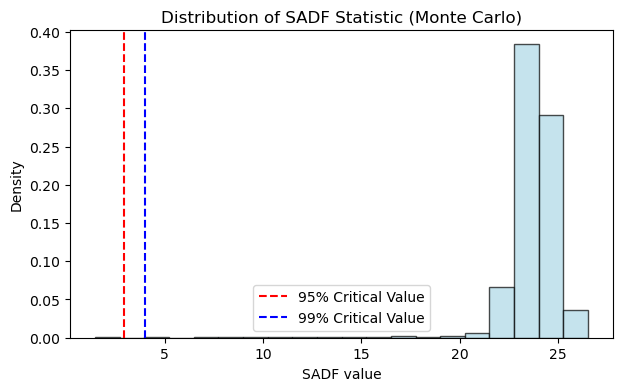

Empirical power at this setting: 0.999


In [52]:
coint_frac = 0.4
B = 2000
crit_val = mf.simulate_sadf_distribution(B=B, T=T, num_series=num_series, coint_frac=coint_frac, num_of_rw=num_of_rw, multi = multipliers, common_fac = common_fac, e = e)
print(crit_val)
crit_val_95 = np.round(crit_val.loc["95%", "Critical Value"],3)
crit_val_99 = np.round(crit_val.loc["99%", "Critical Value"],3)
print("\n")

""" Run Experiment """
sadf_list = []
B = 1500
for i in range(B):
    innov = np.random.normal(0, 1, size=(T - int(T * coint_frac), int(num_of_rw * num_series))) #constant
    sadf_val = mf.run_sadf_bubble_check_2( delta, T, coint_frac, num_of_rw,  common_fac, multipliers, innov, e, crit_val_95, crit_val_99, num_series)
    sadf_list.append(sadf_val)
    loading_bar(i + 1, B)

sadf_array = np.array(sadf_list)
print("\n")
print("Mean SADF:", np.round(np.mean(sadf_array), 3))
print("Median SADF:", np.round(np.median(sadf_array), 3))
print("Min SADF:", np.round(np.min(sadf_array), 3))
print("Max SADF:", np.round(np.max(sadf_array), 3))
print("Standard deviation:", np.round(np.std(sadf_array), 3))
print("25th percentile:", np.round(np.percentile(sadf_array, 25), 3))
print("75th percentile:", np.round(np.percentile(sadf_array, 75), 3))
print("95th percentile:", np.round(np.percentile(sadf_array, 95), 3))
print("99th percentile:", np.round(np.percentile(sadf_array, 99), 3))

plt.figure(figsize=(6,4))
plt.boxplot(sadf_array, vert=True, patch_artist=True)
plt.title("Monte Carlo Distribution of SADF Statistic")
plt.ylabel("SADF value")
plt.show()

plt.figure(figsize=(7,4))
plt.hist(sadf_array, bins=20, color='lightblue', edgecolor='k', alpha=0.7, density=True)
plt.axvline(crit_val_95, color='red', linestyle='--', label='95% Critical Value')
plt.axvline(crit_val_99, color='blue', linestyle='--', label='99% Critical Value')
plt.title("Distribution of SADF Statistic (Monte Carlo)")
plt.xlabel("SADF value")
plt.ylabel("Density")
plt.legend()
plt.show()

power = np.mean(sadf_array > crit_val_95)
print("Empirical power at this setting:", np.round(power, 3))

mean_val   = np.round(np.mean(sadf_array), 3)
median_val = np.round(np.median(sadf_array), 3)
min_val    = np.round(np.min(sadf_array), 3)
max_val    = np.round(np.max(sadf_array), 3)
std_val    = np.round(np.std(sadf_array), 3)
p25_val    = np.round(np.percentile(sadf_array, 25), 3)
p75_val    = np.round(np.percentile(sadf_array, 75), 3)
p95_val    = np.round(np.percentile(sadf_array, 95), 3)
p99_val    = np.round(np.percentile(sadf_array, 99), 3)

SADF_mean_list.append(mean_val)
SADF_median_list.append(median_val)
SADF_min_list.append(min_val)
SADF_max_list.append(max_val)
SADF_std_list.append(std_val)
SADF_p25_list.append(p25_val)
SADF_p75_list.append(p75_val)
SADF_p95_list.append(p95_val)
SADF_p99_list.append(p99_val)
T_list.append(T)
num_series_list.append(num_series)
coint_frac_list.append(coint_frac)
num_of_rw_list.append(num_of_rw)
crit_95_list.append(crit_val_95)
crit_99_list.append(crit_val_99)
power_list.append(power)

Running Simulations: |██████████████████████████████| 100% --- 2000/2000

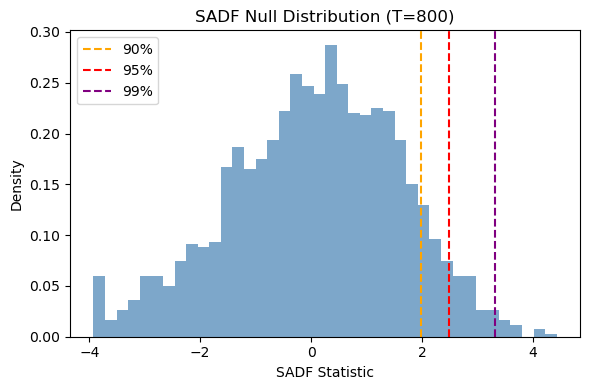

     Critical Value
90%        1.978156
95%        2.487275
99%        3.306965


Running Simulations: |██████████████████████████████| 100% --- 1500/1500

Mean SADF: 25.038
Median SADF: 25.338
Min SADF: 4.801
Max SADF: 28.615
Standard deviation: 2.073
25th percentile: 24.727
75th percentile: 25.878
95th percentile: 26.679
99th percentile: 27.184


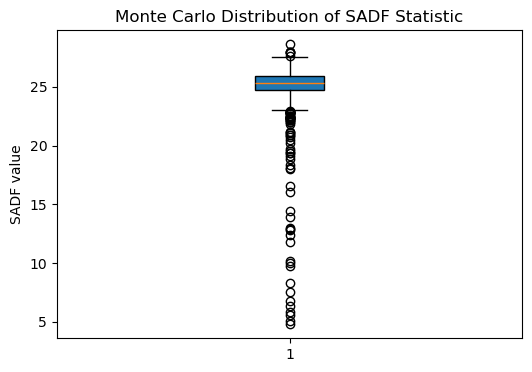

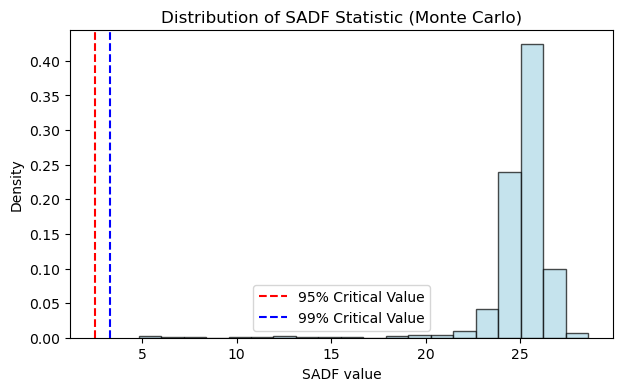

Empirical power at this setting: 1.0


In [53]:
coint_frac = 0.6
B = 2000
crit_val = mf.simulate_sadf_distribution(B=B, T=T, num_series=num_series, coint_frac=coint_frac, num_of_rw=num_of_rw, multi = multipliers, common_fac = common_fac, e = e)
print(crit_val)
crit_val_95 = np.round(crit_val.loc["95%", "Critical Value"],3)
crit_val_99 = np.round(crit_val.loc["99%", "Critical Value"],3)
print("\n")

""" Run Experiment """
sadf_list = []
B = 1500
for i in range(B):
    innov = np.random.normal(0, 1, size=(T - int(T * coint_frac), int(num_of_rw * num_series))) #constant
    sadf_val = mf.run_sadf_bubble_check_2( delta, T, coint_frac, num_of_rw,  common_fac, multipliers, innov, e, crit_val_95, crit_val_99, num_series)
    sadf_list.append(sadf_val)
    loading_bar(i + 1, B)

sadf_array = np.array(sadf_list)
print("\n")
print("Mean SADF:", np.round(np.mean(sadf_array), 3))
print("Median SADF:", np.round(np.median(sadf_array), 3))
print("Min SADF:", np.round(np.min(sadf_array), 3))
print("Max SADF:", np.round(np.max(sadf_array), 3))
print("Standard deviation:", np.round(np.std(sadf_array), 3))
print("25th percentile:", np.round(np.percentile(sadf_array, 25), 3))
print("75th percentile:", np.round(np.percentile(sadf_array, 75), 3))
print("95th percentile:", np.round(np.percentile(sadf_array, 95), 3))
print("99th percentile:", np.round(np.percentile(sadf_array, 99), 3))

plt.figure(figsize=(6,4))
plt.boxplot(sadf_array, vert=True, patch_artist=True)
plt.title("Monte Carlo Distribution of SADF Statistic")
plt.ylabel("SADF value")
plt.show()

plt.figure(figsize=(7,4))
plt.hist(sadf_array, bins=20, color='lightblue', edgecolor='k', alpha=0.7, density=True)
plt.axvline(crit_val_95, color='red', linestyle='--', label='95% Critical Value')
plt.axvline(crit_val_99, color='blue', linestyle='--', label='99% Critical Value')
plt.title("Distribution of SADF Statistic (Monte Carlo)")
plt.xlabel("SADF value")
plt.ylabel("Density")
plt.legend()
plt.show()

power = np.mean(sadf_array > crit_val_95)
print("Empirical power at this setting:", np.round(power, 3))

mean_val   = np.round(np.mean(sadf_array), 3)
median_val = np.round(np.median(sadf_array), 3)
min_val    = np.round(np.min(sadf_array), 3)
max_val    = np.round(np.max(sadf_array), 3)
std_val    = np.round(np.std(sadf_array), 3)
p25_val    = np.round(np.percentile(sadf_array, 25), 3)
p75_val    = np.round(np.percentile(sadf_array, 75), 3)
p95_val    = np.round(np.percentile(sadf_array, 95), 3)
p99_val    = np.round(np.percentile(sadf_array, 99), 3)

SADF_mean_list.append(mean_val)
SADF_median_list.append(median_val)
SADF_min_list.append(min_val)
SADF_max_list.append(max_val)
SADF_std_list.append(std_val)
SADF_p25_list.append(p25_val)
SADF_p75_list.append(p75_val)
SADF_p95_list.append(p95_val)
SADF_p99_list.append(p99_val)
T_list.append(T)
num_series_list.append(num_series)
coint_frac_list.append(coint_frac)
num_of_rw_list.append(num_of_rw)
crit_95_list.append(crit_val_95)
crit_99_list.append(crit_val_99)
power_list.append(power)

Running Simulations: |██████████████████████████████| 100% --- 2000/2000

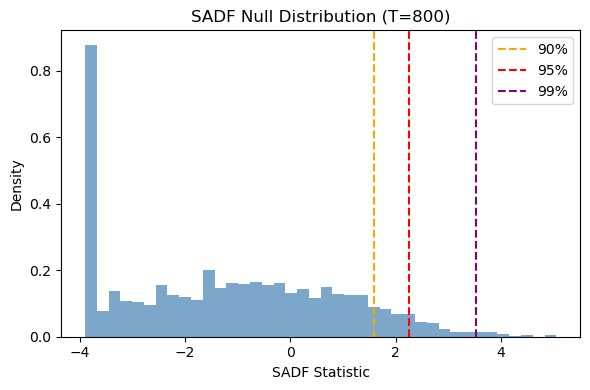

     Critical Value
90%        1.591172
95%        2.260400
99%        3.521327


Running Simulations: |██████████████████████████████| 100% --- 1500/1500

Mean SADF: 12.714
Median SADF: 13.774
Min SADF: -3.902
Max SADF: 23.311
Standard deviation: 5.579
25th percentile: 9.455
75th percentile: 16.826
95th percentile: 19.95
99th percentile: 21.684


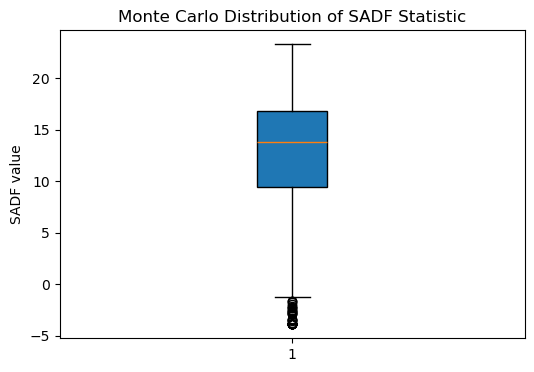

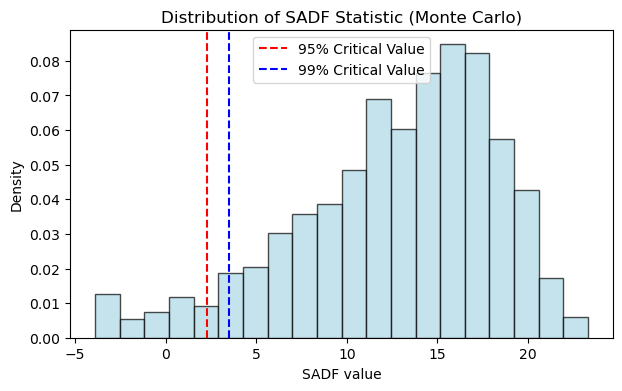

Empirical power at this setting: 0.945


In [54]:
coint_frac = 0.8
B = 2000
crit_val = mf.simulate_sadf_distribution(B=B, T=T, num_series=num_series, coint_frac=coint_frac, num_of_rw=num_of_rw, multi = multipliers, common_fac = common_fac, e = e)
print(crit_val)
crit_val_95 = np.round(crit_val.loc["95%", "Critical Value"],3)
crit_val_99 = np.round(crit_val.loc["99%", "Critical Value"],3)
print("\n")

""" Run Experiment """
sadf_list = []
B = 1500
for i in range(B):
    innov = np.random.normal(0, 1, size=(T - int(T * coint_frac), int(num_of_rw * num_series))) #constant
    sadf_val = mf.run_sadf_bubble_check_2( delta, T, coint_frac, num_of_rw,  common_fac, multipliers, innov, e, crit_val_95, crit_val_99, num_series)
    sadf_list.append(sadf_val)
    loading_bar(i + 1, B)

sadf_array = np.array(sadf_list)
print("\n")
print("Mean SADF:", np.round(np.mean(sadf_array), 3))
print("Median SADF:", np.round(np.median(sadf_array), 3))
print("Min SADF:", np.round(np.min(sadf_array), 3))
print("Max SADF:", np.round(np.max(sadf_array), 3))
print("Standard deviation:", np.round(np.std(sadf_array), 3))
print("25th percentile:", np.round(np.percentile(sadf_array, 25), 3))
print("75th percentile:", np.round(np.percentile(sadf_array, 75), 3))
print("95th percentile:", np.round(np.percentile(sadf_array, 95), 3))
print("99th percentile:", np.round(np.percentile(sadf_array, 99), 3))

plt.figure(figsize=(6,4))
plt.boxplot(sadf_array, vert=True, patch_artist=True)
plt.title("Monte Carlo Distribution of SADF Statistic")
plt.ylabel("SADF value")
plt.show()

plt.figure(figsize=(7,4))
plt.hist(sadf_array, bins=20, color='lightblue', edgecolor='k', alpha=0.7, density=True)
plt.axvline(crit_val_95, color='red', linestyle='--', label='95% Critical Value')
plt.axvline(crit_val_99, color='blue', linestyle='--', label='99% Critical Value')
plt.title("Distribution of SADF Statistic (Monte Carlo)")
plt.xlabel("SADF value")
plt.ylabel("Density")
plt.legend()
plt.show()

power = np.mean(sadf_array > crit_val_95)
print("Empirical power at this setting:", np.round(power, 3))

mean_val   = np.round(np.mean(sadf_array), 3)
median_val = np.round(np.median(sadf_array), 3)
min_val    = np.round(np.min(sadf_array), 3)
max_val    = np.round(np.max(sadf_array), 3)
std_val    = np.round(np.std(sadf_array), 3)
p25_val    = np.round(np.percentile(sadf_array, 25), 3)
p75_val    = np.round(np.percentile(sadf_array, 75), 3)
p95_val    = np.round(np.percentile(sadf_array, 95), 3)
p99_val    = np.round(np.percentile(sadf_array, 99), 3)

SADF_mean_list.append(mean_val)
SADF_median_list.append(median_val)
SADF_min_list.append(min_val)
SADF_max_list.append(max_val)
SADF_std_list.append(std_val)
SADF_p25_list.append(p25_val)
SADF_p75_list.append(p75_val)
SADF_p95_list.append(p95_val)
SADF_p99_list.append(p99_val)
T_list.append(T)
num_series_list.append(num_series)
coint_frac_list.append(coint_frac)
num_of_rw_list.append(num_of_rw)
crit_95_list.append(crit_val_95)
crit_99_list.append(crit_val_99)
power_list.append(power)

## N = 1000

In [56]:
T = 1000
e = eps[:T,:].copy()
common_fac = z[:T].copy()

Running Simulations: |██████████████████████████████| 100% --- 2000/2000

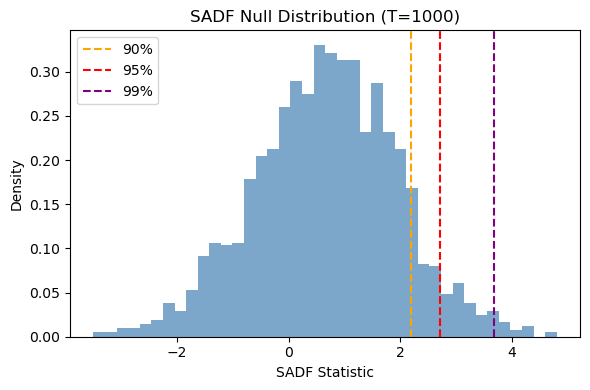

     Critical Value
90%        2.193481
95%        2.715714
99%        3.668009


Running Simulations: |██████████████████████████████| 100% --- 1500/1500

Mean SADF: 26.563
Median SADF: 26.547
Min SADF: 23.759
Max SADF: 29.02
Standard deviation: 0.781
25th percentile: 26.042
75th percentile: 27.118
95th percentile: 27.873
99th percentile: 28.326


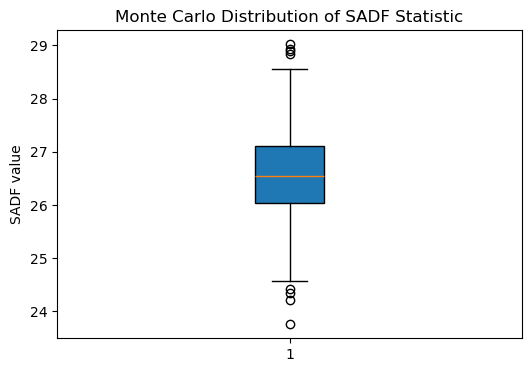

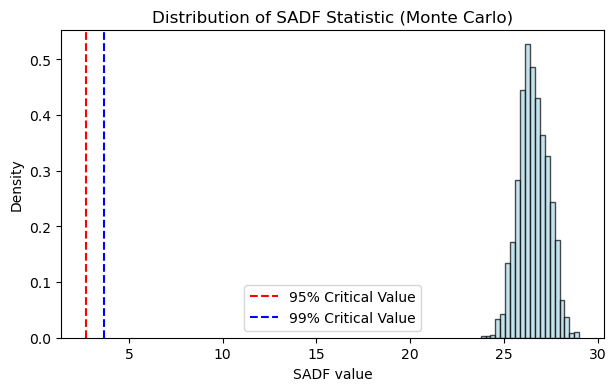

Empirical power at this setting: 1.0


In [57]:
coint_frac = 0.4
B = 2000
crit_val = mf.simulate_sadf_distribution(B=B, T=T, num_series=num_series, coint_frac=coint_frac, num_of_rw=num_of_rw, multi = multipliers, common_fac = common_fac, e = e)
print(crit_val)
crit_val_95 = np.round(crit_val.loc["95%", "Critical Value"],3)
crit_val_99 = np.round(crit_val.loc["99%", "Critical Value"],3)
print("\n")

""" Run Experiment """
sadf_list = []
B = 1500
for i in range(B):
    innov = np.random.normal(0, 1, size=(T - int(T * coint_frac), int(num_of_rw * num_series))) #constant
    sadf_val = mf.run_sadf_bubble_check_2( delta, T, coint_frac, num_of_rw,  common_fac, multipliers, innov, e, crit_val_95, crit_val_99, num_series)
    sadf_list.append(sadf_val)
    loading_bar(i + 1, B)

sadf_array = np.array(sadf_list)
print("\n")
print("Mean SADF:", np.round(np.mean(sadf_array), 3))
print("Median SADF:", np.round(np.median(sadf_array), 3))
print("Min SADF:", np.round(np.min(sadf_array), 3))
print("Max SADF:", np.round(np.max(sadf_array), 3))
print("Standard deviation:", np.round(np.std(sadf_array), 3))
print("25th percentile:", np.round(np.percentile(sadf_array, 25), 3))
print("75th percentile:", np.round(np.percentile(sadf_array, 75), 3))
print("95th percentile:", np.round(np.percentile(sadf_array, 95), 3))
print("99th percentile:", np.round(np.percentile(sadf_array, 99), 3))

plt.figure(figsize=(6,4))
plt.boxplot(sadf_array, vert=True, patch_artist=True)
plt.title("Monte Carlo Distribution of SADF Statistic")
plt.ylabel("SADF value")
plt.show()

plt.figure(figsize=(7,4))
plt.hist(sadf_array, bins=20, color='lightblue', edgecolor='k', alpha=0.7, density=True)
plt.axvline(crit_val_95, color='red', linestyle='--', label='95% Critical Value')
plt.axvline(crit_val_99, color='blue', linestyle='--', label='99% Critical Value')
plt.title("Distribution of SADF Statistic (Monte Carlo)")
plt.xlabel("SADF value")
plt.ylabel("Density")
plt.legend()
plt.show()

power = np.mean(sadf_array > crit_val_95)
print("Empirical power at this setting:", np.round(power, 3))

mean_val   = np.round(np.mean(sadf_array), 3)
median_val = np.round(np.median(sadf_array), 3)
min_val    = np.round(np.min(sadf_array), 3)
max_val    = np.round(np.max(sadf_array), 3)
std_val    = np.round(np.std(sadf_array), 3)
p25_val    = np.round(np.percentile(sadf_array, 25), 3)
p75_val    = np.round(np.percentile(sadf_array, 75), 3)
p95_val    = np.round(np.percentile(sadf_array, 95), 3)
p99_val    = np.round(np.percentile(sadf_array, 99), 3)

SADF_mean_list.append(mean_val)
SADF_median_list.append(median_val)
SADF_min_list.append(min_val)
SADF_max_list.append(max_val)
SADF_std_list.append(std_val)
SADF_p25_list.append(p25_val)
SADF_p75_list.append(p75_val)
SADF_p95_list.append(p95_val)
SADF_p99_list.append(p99_val)
T_list.append(T)
num_series_list.append(num_series)
coint_frac_list.append(coint_frac)
num_of_rw_list.append(num_of_rw)
crit_95_list.append(crit_val_95)
crit_99_list.append(crit_val_99)
power_list.append(power)

Running Simulations: |██████████████████████████████| 100% --- 2000/2000

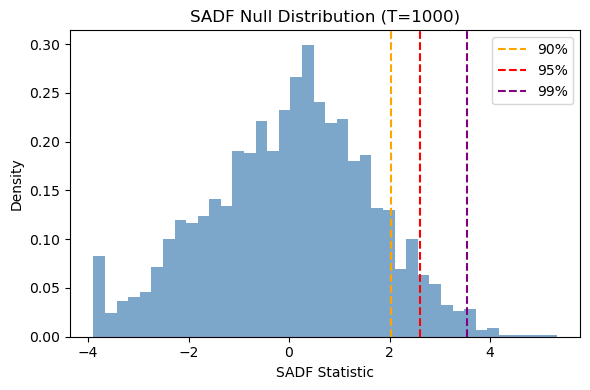

     Critical Value
90%        2.027989
95%        2.602315
99%        3.551742


Running Simulations: |██████████████████████████████| 100% --- 1500/1500

Mean SADF: 28.558
Median SADF: 29.012
Min SADF: -0.815
Max SADF: 31.768
Standard deviation: 2.774
25th percentile: 28.387
75th percentile: 29.55
95th percentile: 30.323
99th percentile: 30.751


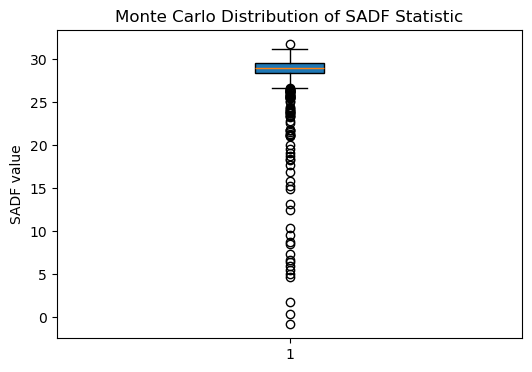

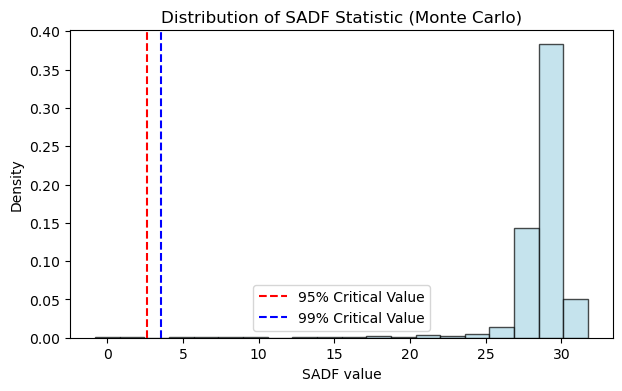

Empirical power at this setting: 0.998


In [58]:
coint_frac = 0.6
B = 2000
crit_val = mf.simulate_sadf_distribution(B=B, T=T, num_series=num_series, coint_frac=coint_frac, num_of_rw=num_of_rw, multi = multipliers, common_fac = common_fac, e = e)
print(crit_val)
crit_val_95 = np.round(crit_val.loc["95%", "Critical Value"],3)
crit_val_99 = np.round(crit_val.loc["99%", "Critical Value"],3)
print("\n")

""" Run Experiment """
sadf_list = []
B = 1500
for i in range(B):
    innov = np.random.normal(0, 1, size=(T - int(T * coint_frac), int(num_of_rw * num_series))) #constant
    sadf_val = mf.run_sadf_bubble_check_2( delta, T, coint_frac, num_of_rw,  common_fac, multipliers, innov, e, crit_val_95, crit_val_99, num_series)
    sadf_list.append(sadf_val)
    loading_bar(i + 1, B)

sadf_array = np.array(sadf_list)
print("\n")
print("Mean SADF:", np.round(np.mean(sadf_array), 3))
print("Median SADF:", np.round(np.median(sadf_array), 3))
print("Min SADF:", np.round(np.min(sadf_array), 3))
print("Max SADF:", np.round(np.max(sadf_array), 3))
print("Standard deviation:", np.round(np.std(sadf_array), 3))
print("25th percentile:", np.round(np.percentile(sadf_array, 25), 3))
print("75th percentile:", np.round(np.percentile(sadf_array, 75), 3))
print("95th percentile:", np.round(np.percentile(sadf_array, 95), 3))
print("99th percentile:", np.round(np.percentile(sadf_array, 99), 3))

plt.figure(figsize=(6,4))
plt.boxplot(sadf_array, vert=True, patch_artist=True)
plt.title("Monte Carlo Distribution of SADF Statistic")
plt.ylabel("SADF value")
plt.show()

plt.figure(figsize=(7,4))
plt.hist(sadf_array, bins=20, color='lightblue', edgecolor='k', alpha=0.7, density=True)
plt.axvline(crit_val_95, color='red', linestyle='--', label='95% Critical Value')
plt.axvline(crit_val_99, color='blue', linestyle='--', label='99% Critical Value')
plt.title("Distribution of SADF Statistic (Monte Carlo)")
plt.xlabel("SADF value")
plt.ylabel("Density")
plt.legend()
plt.show()

power = np.mean(sadf_array > crit_val_95)
print("Empirical power at this setting:", np.round(power, 3))

mean_val   = np.round(np.mean(sadf_array), 3)
median_val = np.round(np.median(sadf_array), 3)
min_val    = np.round(np.min(sadf_array), 3)
max_val    = np.round(np.max(sadf_array), 3)
std_val    = np.round(np.std(sadf_array), 3)
p25_val    = np.round(np.percentile(sadf_array, 25), 3)
p75_val    = np.round(np.percentile(sadf_array, 75), 3)
p95_val    = np.round(np.percentile(sadf_array, 95), 3)
p99_val    = np.round(np.percentile(sadf_array, 99), 3)

SADF_mean_list.append(mean_val)
SADF_median_list.append(median_val)
SADF_min_list.append(min_val)
SADF_max_list.append(max_val)
SADF_std_list.append(std_val)
SADF_p25_list.append(p25_val)
SADF_p75_list.append(p75_val)
SADF_p95_list.append(p95_val)
SADF_p99_list.append(p99_val)
T_list.append(T)
num_series_list.append(num_series)
coint_frac_list.append(coint_frac)
num_of_rw_list.append(num_of_rw)
crit_95_list.append(crit_val_95)
crit_99_list.append(crit_val_99)
power_list.append(power)

Running Simulations: |██████████████████████████████| 100% --- 2000/2000

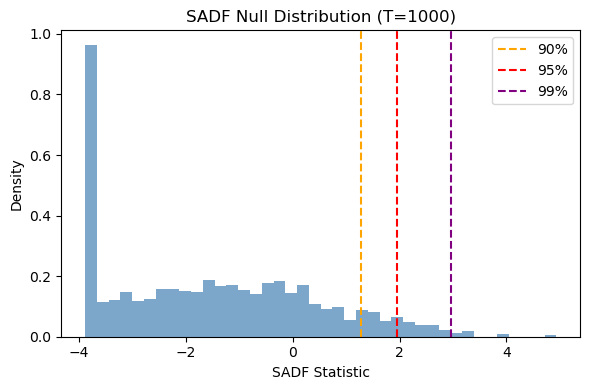

     Critical Value
90%        1.283172
95%        1.947395
99%        2.955289


Running Simulations: |██████████████████████████████| 100% --- 1500/1500

Mean SADF: 16.938
Median SADF: 18.583
Min SADF: -3.887
Max SADF: 30.148
Standard deviation: 7.487
25th percentile: 12.688
75th percentile: 22.578
95th percentile: 26.348
99th percentile: 27.953


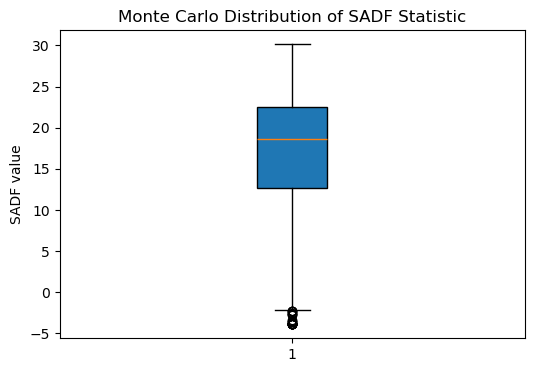

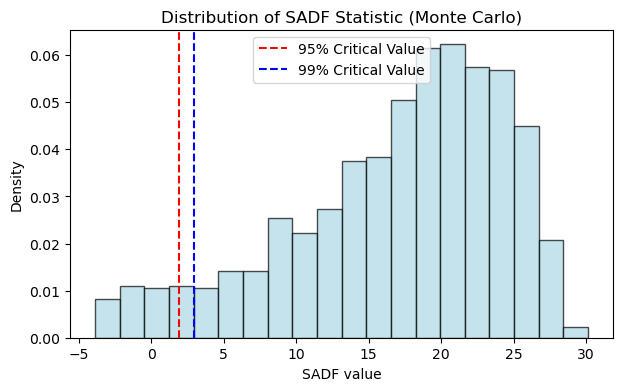

Empirical power at this setting: 0.943


In [59]:
coint_frac = 0.8
B = 2000
crit_val = mf.simulate_sadf_distribution(B=B, T=T, num_series=num_series, coint_frac=coint_frac, num_of_rw=num_of_rw, multi = multipliers, common_fac = common_fac, e = e)
print(crit_val)
crit_val_95 = np.round(crit_val.loc["95%", "Critical Value"],3)
crit_val_99 = np.round(crit_val.loc["99%", "Critical Value"],3)
print("\n")

""" Run Experiment """
sadf_list = []
B = 1500
for i in range(B):
    innov = np.random.normal(0, 1, size=(T - int(T * coint_frac), int(num_of_rw * num_series))) #constant
    sadf_val = mf.run_sadf_bubble_check_2( delta, T, coint_frac, num_of_rw,  common_fac, multipliers, innov, e, crit_val_95, crit_val_99, num_series)
    sadf_list.append(sadf_val)
    loading_bar(i + 1, B)

sadf_array = np.array(sadf_list)
print("\n")
print("Mean SADF:", np.round(np.mean(sadf_array), 3))
print("Median SADF:", np.round(np.median(sadf_array), 3))
print("Min SADF:", np.round(np.min(sadf_array), 3))
print("Max SADF:", np.round(np.max(sadf_array), 3))
print("Standard deviation:", np.round(np.std(sadf_array), 3))
print("25th percentile:", np.round(np.percentile(sadf_array, 25), 3))
print("75th percentile:", np.round(np.percentile(sadf_array, 75), 3))
print("95th percentile:", np.round(np.percentile(sadf_array, 95), 3))
print("99th percentile:", np.round(np.percentile(sadf_array, 99), 3))

plt.figure(figsize=(6,4))
plt.boxplot(sadf_array, vert=True, patch_artist=True)
plt.title("Monte Carlo Distribution of SADF Statistic")
plt.ylabel("SADF value")
plt.show()

plt.figure(figsize=(7,4))
plt.hist(sadf_array, bins=20, color='lightblue', edgecolor='k', alpha=0.7, density=True)
plt.axvline(crit_val_95, color='red', linestyle='--', label='95% Critical Value')
plt.axvline(crit_val_99, color='blue', linestyle='--', label='99% Critical Value')
plt.title("Distribution of SADF Statistic (Monte Carlo)")
plt.xlabel("SADF value")
plt.ylabel("Density")
plt.legend()
plt.show()

power = np.mean(sadf_array > crit_val_95)
print("Empirical power at this setting:", np.round(power, 3))

mean_val   = np.round(np.mean(sadf_array), 3)
median_val = np.round(np.median(sadf_array), 3)
min_val    = np.round(np.min(sadf_array), 3)
max_val    = np.round(np.max(sadf_array), 3)
std_val    = np.round(np.std(sadf_array), 3)
p25_val    = np.round(np.percentile(sadf_array, 25), 3)
p75_val    = np.round(np.percentile(sadf_array, 75), 3)
p95_val    = np.round(np.percentile(sadf_array, 95), 3)
p99_val    = np.round(np.percentile(sadf_array, 99), 3)

SADF_mean_list.append(mean_val)
SADF_median_list.append(median_val)
SADF_min_list.append(min_val)
SADF_max_list.append(max_val)
SADF_std_list.append(std_val)
SADF_p25_list.append(p25_val)
SADF_p75_list.append(p75_val)
SADF_p95_list.append(p95_val)
SADF_p99_list.append(p99_val)
T_list.append(T)
num_series_list.append(num_series)
coint_frac_list.append(coint_frac)
num_of_rw_list.append(num_of_rw)
crit_95_list.append(crit_val_95)
crit_99_list.append(crit_val_99)
power_list.append(power)

In [60]:
df = pd.DataFrame({
    'T':                 T_list,
    'num_series':        num_series_list,
    'coint_frac':        coint_frac_list,
    'num_of_rw':         num_of_rw_list,
    'SADF_mean':         SADF_mean_list,
    'SADF_median':       SADF_median_list,
    'SADF_min':          SADF_min_list,
    'SADF_max':          SADF_max_list,
    'SADF_std':          SADF_std_list,
    'SADF_p25':          SADF_p25_list,
    'SADF_p75':          SADF_p75_list,
    'SADF_p95':          SADF_p95_list,
    'SADF_p99':          SADF_p99_list,
    'crit_95':           crit_95_list,
    'crit_99':           crit_99_list,
    'power':             power_list
})

output_filename = f"{num_series}_Series_Experiment.csv"
df.to_csv(output_filename, index=False)
print(f"Results written to {output_filename}")
import sounddevice as sd
fs = 50100  # sample rate
t = np.linspace(0, 2, fs, False)             # 1 second
sd.play(np.sin(2 * np.pi * 440 * t) * 0.5, fs)  # 440 Hz at half volume
sd.wait()
np.random.seed(22)

Results written to 10_Series_Experiment.csv
